### The Situation:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

We have been provided a group of datasets, if which we are to draw meaningful insight. However, before we look to our datasets, we must find understand what our client wants and what they seek to implement.

Client parameters are the following:

1. Invest within the Cab industry
2. Implementation via G2M strategy.

### What is a G2M Strategy?

A go-to-market (G2M) strategy is a step-by-step plan for launching a new product or expanding an existing product into a new market. It sets your initiative up for success by answering the following questions: 

1. What product are you selling, and what unique problem does it solve?

2. Who is your ideal customer, and what points do they experience? 

3. Where will you sell your product? What markets do you want to pursue, and what does the demand and competition look like in those markets?

4. How will you reach your target customers and create demand? 

Since, based on the information they have been given, XYZ has not yet made an investment decision, we can assume they are researching remaining details before placing their allocations into a given company. Our dataset is composed of 2 companies, so we can make the assumption they have at least done enough preliminary meetings to drill down. Thus, in our upcoming analysis, we should try and answer these questions:

1. How efficiently does Cab Company A and Cab Company B solve the business problem i.e. cab service?

2. What are their primary customer demographics, and how do these companies approach in providing optimal experiences for them?

3. Where do Cab A and Cab B operate? Are there any specific demand or constraints that exist within these regions?

4. In the event there are areas of weak demand, how do these companies create it?

### The Implementation:

We shall be performing an Explanatory Data Analysis (EDA) in the scope of this problem, and after a sufficient basic analysis of these datasets, we shall compare them to the above central questions and through the goal of our client.

The business of an investment firm is to offer assets and resources as a client, in the homes this initial investment will allow for a return of profit. We shall exmaine the performance of these companies in an attempt to find which would not only be a superior competitor in the short term, but attempt longer term conlusions with what approximations we can make from this dataset and potential third party resources.

Let us begin with loading our libraries and examining the Cab_Data set.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
#load in the data
cabData = pd.read_csv('Cab_Data.csv', parse_dates=['Date of Travel'])
cityData = pd.read_csv('City.csv')
cabCust = pd.read_csv('Customer_ID.csv')
cabTr = pd.read_csv('Transaction_ID.csv')

## Data Cleaning and Merging

In [3]:
cabData.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#not a fan of the dates
cabData['Date of Travel'] = pd.to_datetime(cabData['Date of Travel'])
cabData['Year'] = cabData['Date of Travel'].dt.year #adding a new 'Year' column
cabData['Month'] = cabData['Date of Travel'].dt.month #adding a new 'Month' column

cabData = cabData.drop(['Date of Travel'], axis =1 )

cabData.head(5)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1


In [5]:
cityData.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
#remove the columns
cityData['Population'] = [x.replace(',','') for x in cityData['Population']]
cityData['Users'] = [x.replace(',','') for x in cityData['Users']]
cityData['Population'] = cityData['Population'].astype(float)
cityData['Users'] = cityData['Users'].astype(float)
cityData.head(5)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [7]:
cabCust.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
cabTr.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
#merge the dataset to save time
df = cabData.merge(cabTr, on= 'Transaction ID').merge(cabCust, on ='Customer ID').merge(cityData, on = 'City')
df.head(10)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885.0,24701.0
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,5,27703,Cash,Male,27,9237,814885.0,24701.0
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018,10,27703,Card,Male,27,9237,814885.0,24701.0
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,28712,Cash,Male,53,11242,814885.0,24701.0
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,9,28712,Card,Male,53,11242,814885.0,24701.0
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,2017,6,28712,Card,Male,53,11242,814885.0,24701.0


In [10]:
#now for some renaming
df.rename(columns={"Transaction ID": "Transaction_ID", "KM Travelled": "KM_Travelled",
                  "Price Charged": "Price_Charged", "Cost of Trip": "Cost_of_Trip",
                  "Income (USD/Month)": "Income_USD_Month", "Customer ID": "Customer_ID"}, inplace = True)

In [11]:
df.head(10)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885.0,24701.0
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,5,27703,Cash,Male,27,9237,814885.0,24701.0
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018,10,27703,Card,Male,27,9237,814885.0,24701.0
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,28712,Cash,Male,53,11242,814885.0,24701.0
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,9,28712,Card,Male,53,11242,814885.0,24701.0
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,2017,6,28712,Card,Male,53,11242,814885.0,24701.0


In [12]:
#Price Charged - Cost of Trip
df["Profit"] = df['Price_Charged'] - df['Cost_of_Trip']
#Cost of Trip / Price Charged -- For every dollar, what did I get back?
df["Profit_Proportion"] = df['Cost_of_Trip'] / df['Price_Charged']
#For every KM I traveled, what did I make?
df["Profit_per_KM"] = df['Price_Charged'] / df['KM_Travelled']

df.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Profit,Profit_Proportion,Profit_per_KM
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,29290,Card,Male,28,10813,814885.0,24701.0,57.3150,0.845491,12.182266
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,29290,Cash,Male,28,10813,814885.0,24701.0,281.2772,0.530187,22.859870
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885.0,24701.0,194.6480,0.754248,18.614571
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,27703,Card,Male,27,9237,814885.0,24701.0,23.6660,0.933990,12.526904
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885.0,24701.0,253.9808,0.647787,19.821330


In [13]:
df.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Age,Income_USD_Month,Population,Users,Profit,Profit_Proportion,Profit_per_KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,2017.045199,7.500434,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198,0.728716,18.765127
std,1.268058e+05,12.233526,274.378911,157.993661,0.800239,3.445095,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840,0.185501,5.878560
min,1.000001e+07,1.900000,15.600000,19.000000,2016.000000,1.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,0.237974,6.338621
25%,1.011081e+07,12.000000,206.437500,151.200000,2016.000000,5.000000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000,0.583880,14.451327
50%,1.022104e+07,22.440000,386.360000,282.480000,2017.000000,8.000000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000,0.735697,17.153501
75%,1.033094e+07,32.960000,583.660000,413.683200,2018.000000,10.000000,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000,0.861441,22.234926
max,1.044011e+07,48.000000,2048.030000,691.200000,2018.000000,12.000000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000,1.693015,53.955556


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     359392 non-null  int64  
 1   Company            359392 non-null  object 
 2   City               359392 non-null  object 
 3   KM_Travelled       359392 non-null  float64
 4   Price_Charged      359392 non-null  float64
 5   Cost_of_Trip       359392 non-null  float64
 6   Year               359392 non-null  int64  
 7   Month              359392 non-null  int64  
 8   Customer_ID        359392 non-null  int64  
 9   Payment_Mode       359392 non-null  object 
 10  Gender             359392 non-null  object 
 11  Age                359392 non-null  int64  
 12  Income_USD_Month   359392 non-null  int64  
 13  Population         359392 non-null  float64
 14  Users              359392 non-null  float64
 15  Profit             359392 non-null  float64
 16  Pr

In [15]:
ycab = df[df['Company'] == "Yellow Cab"]
pcab = df[df['Company'] == "Pink Cab"]

# An Analysis of Profits

From the perspective of an investment firm, I am going to want to know what kind of profit can be generated from my contributions. Typically when I am evaulating a company, I would take a look at their financial statements, brand, investor relations, and other sources.

Since we are down to 2 companies, we can make an assumption XYZ has at least done a basic overview of this. And since we only have some financial metrics to work with and are lacking balance sheets, we shall work with what variables we have.

Let us start with comparing the company profits with some basic comparions, then drill down.

We will ask the following questions:

1. The profit difference between two companies
2. The proportion of profits
3. Number of Transactions/sales per company
4. Distribution of profits across the cities.
5. Distribution of profits throughout the months/years.

### 1. General Profit Comparisons

In [16]:
#Let's compare month over month
round(df.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


In [17]:
#Profit Proportion
round(df.groupby(['Company']).Profit_Proportion.sum().to_frame('Profit Proportion'),0)

,Profit Proportion
Company,
Pink Cab,69988.0
Yellow Cab,191907.0


### 2. Proportion of Profits

In [18]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

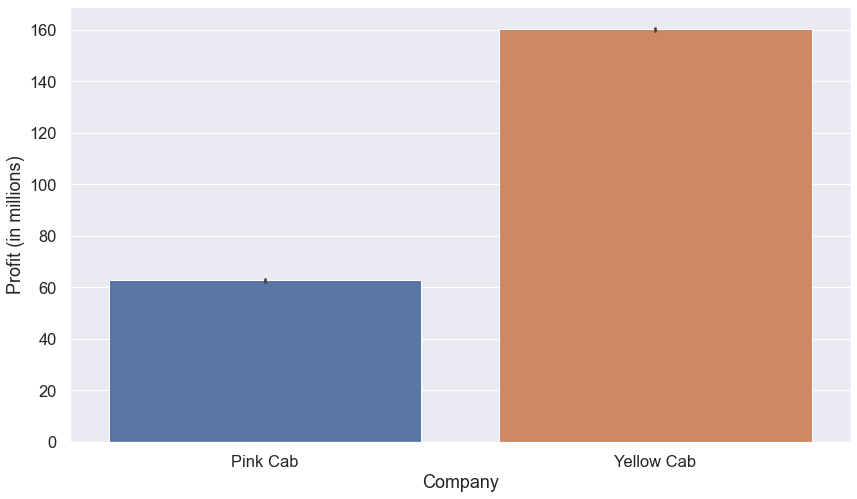

In [19]:
plt.figure(figsize = (14,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "Company", y = "Profit", hue = None, dodge = False)
plt.xlabel("Company")
plt.ylabel("Profit (in millions)")
plt.show()

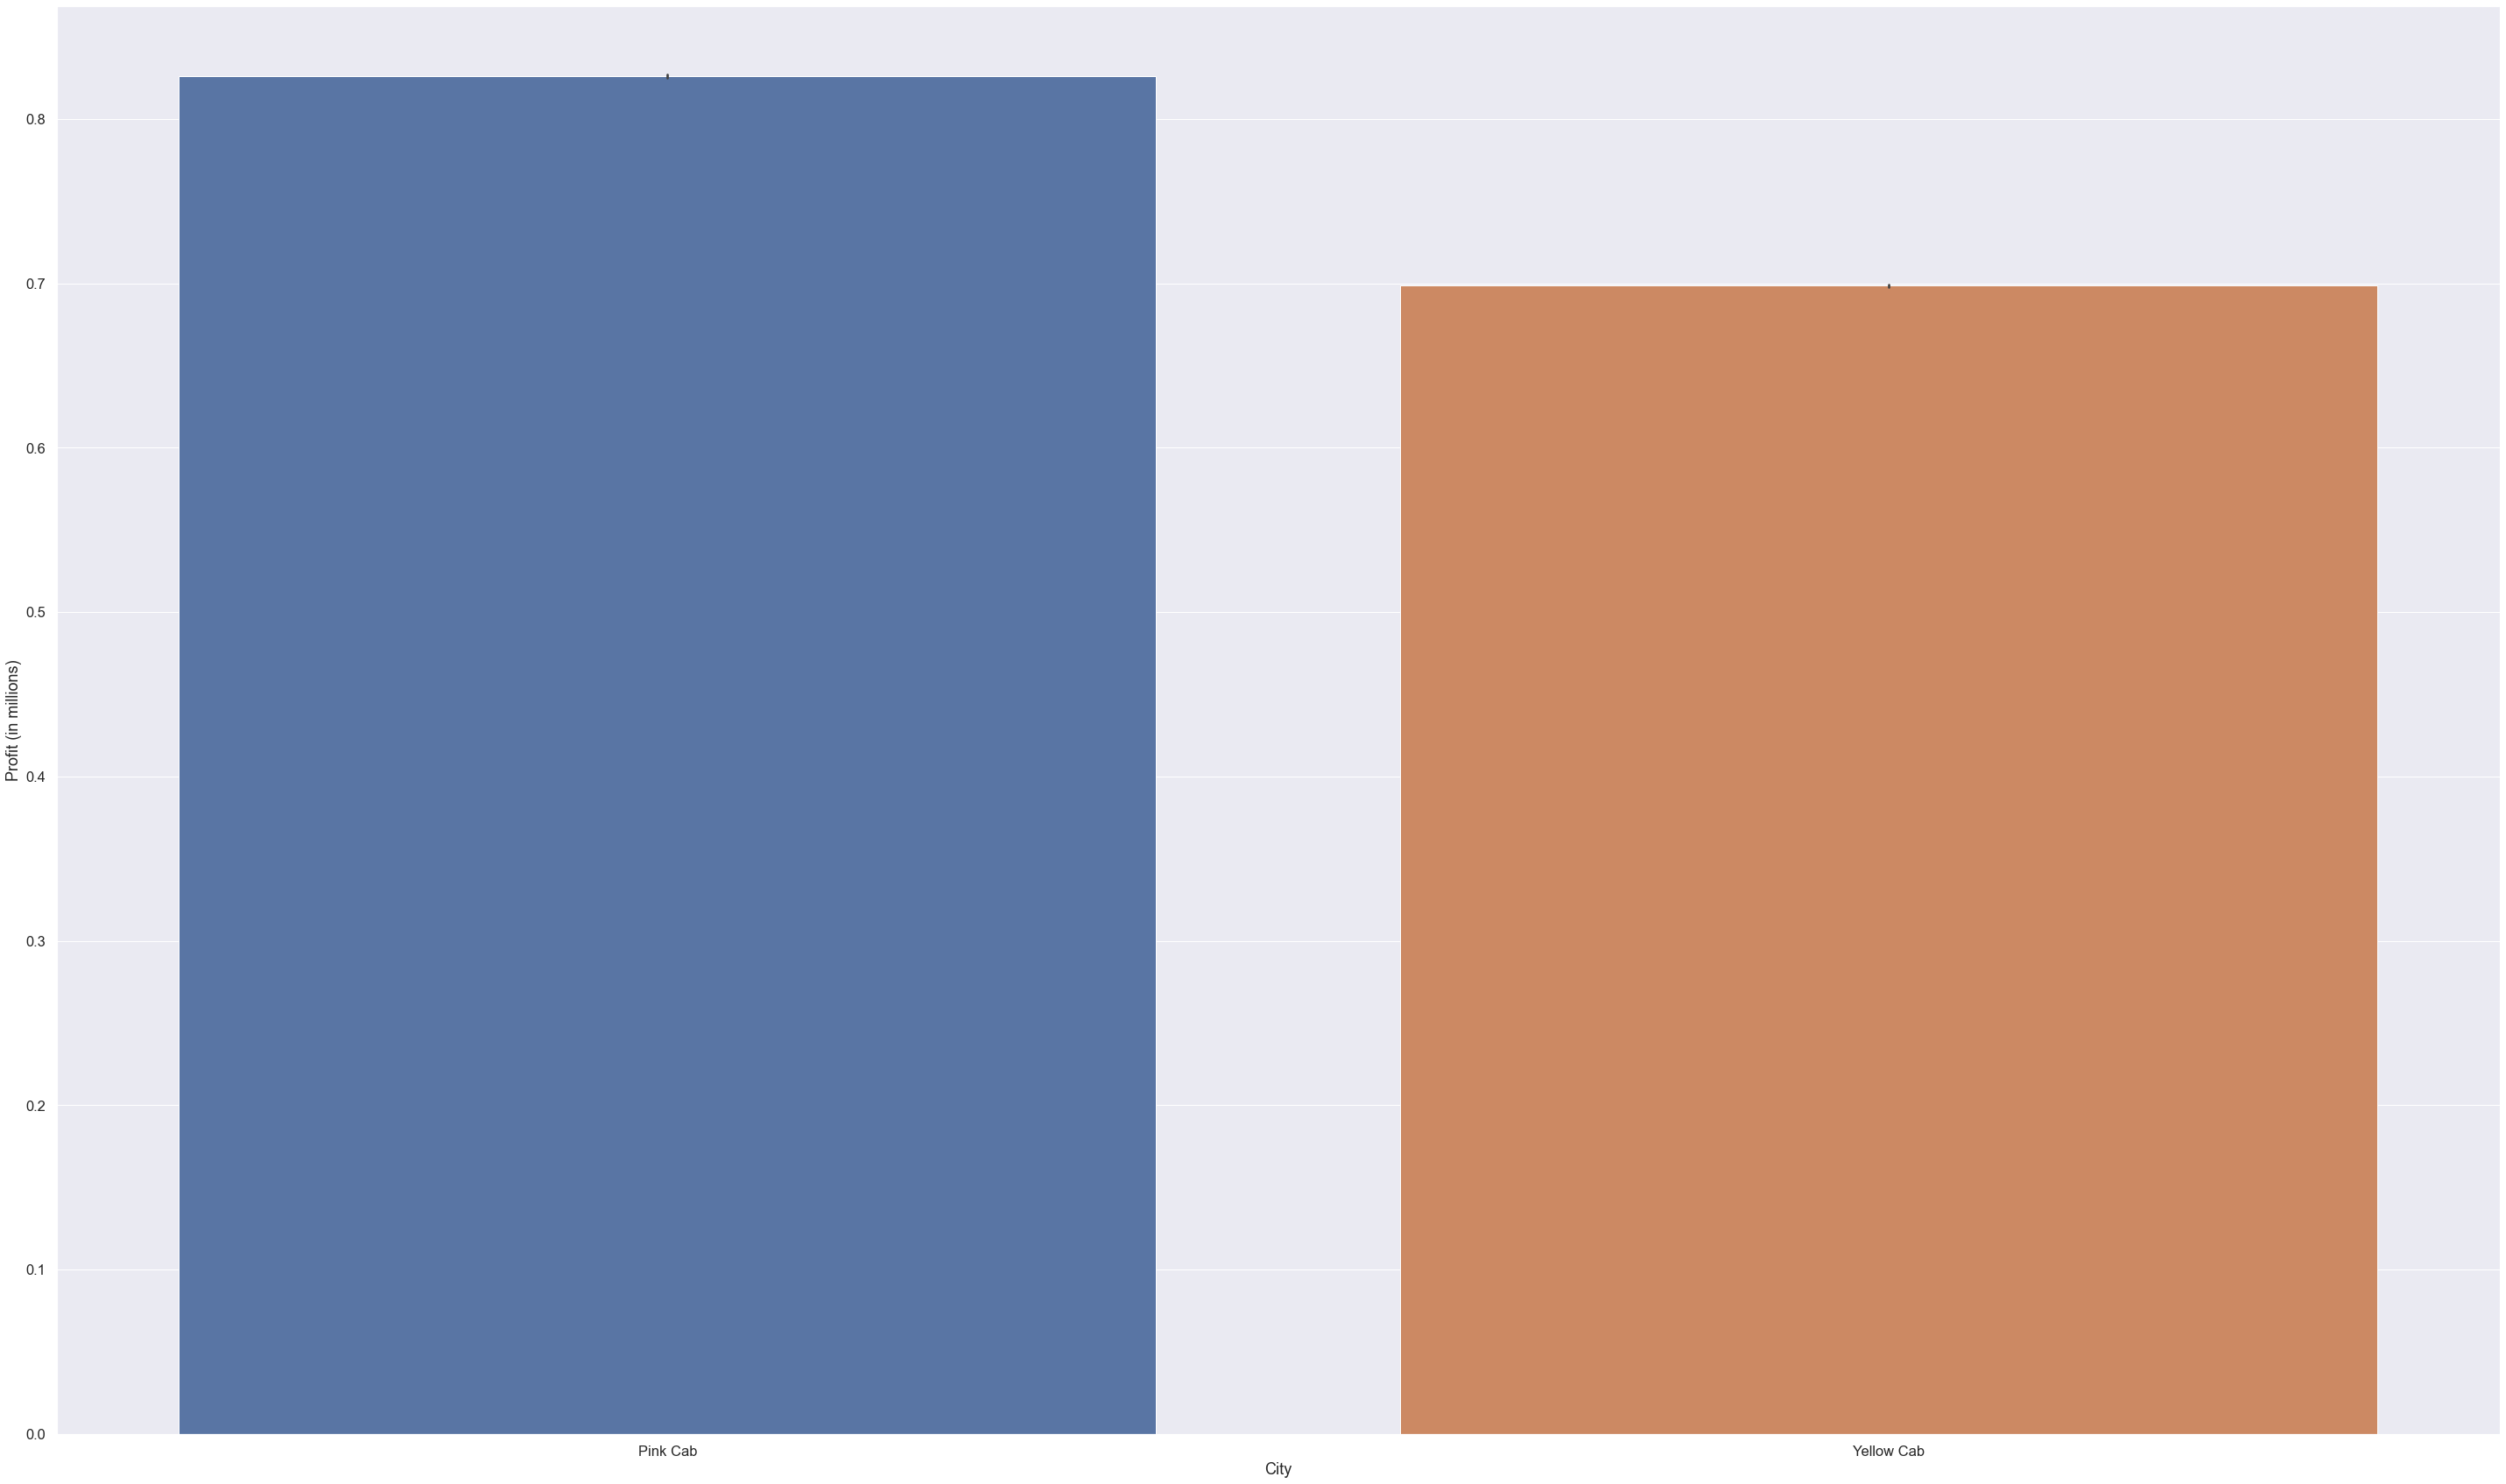

In [20]:
#
plt.figure(figsize = (50,30))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "Company", y = "Profit_Proportion", hue = None, dodge = False)
plt.xlabel("City")
plt.ylabel("Profit (in millions)")
plt.show()

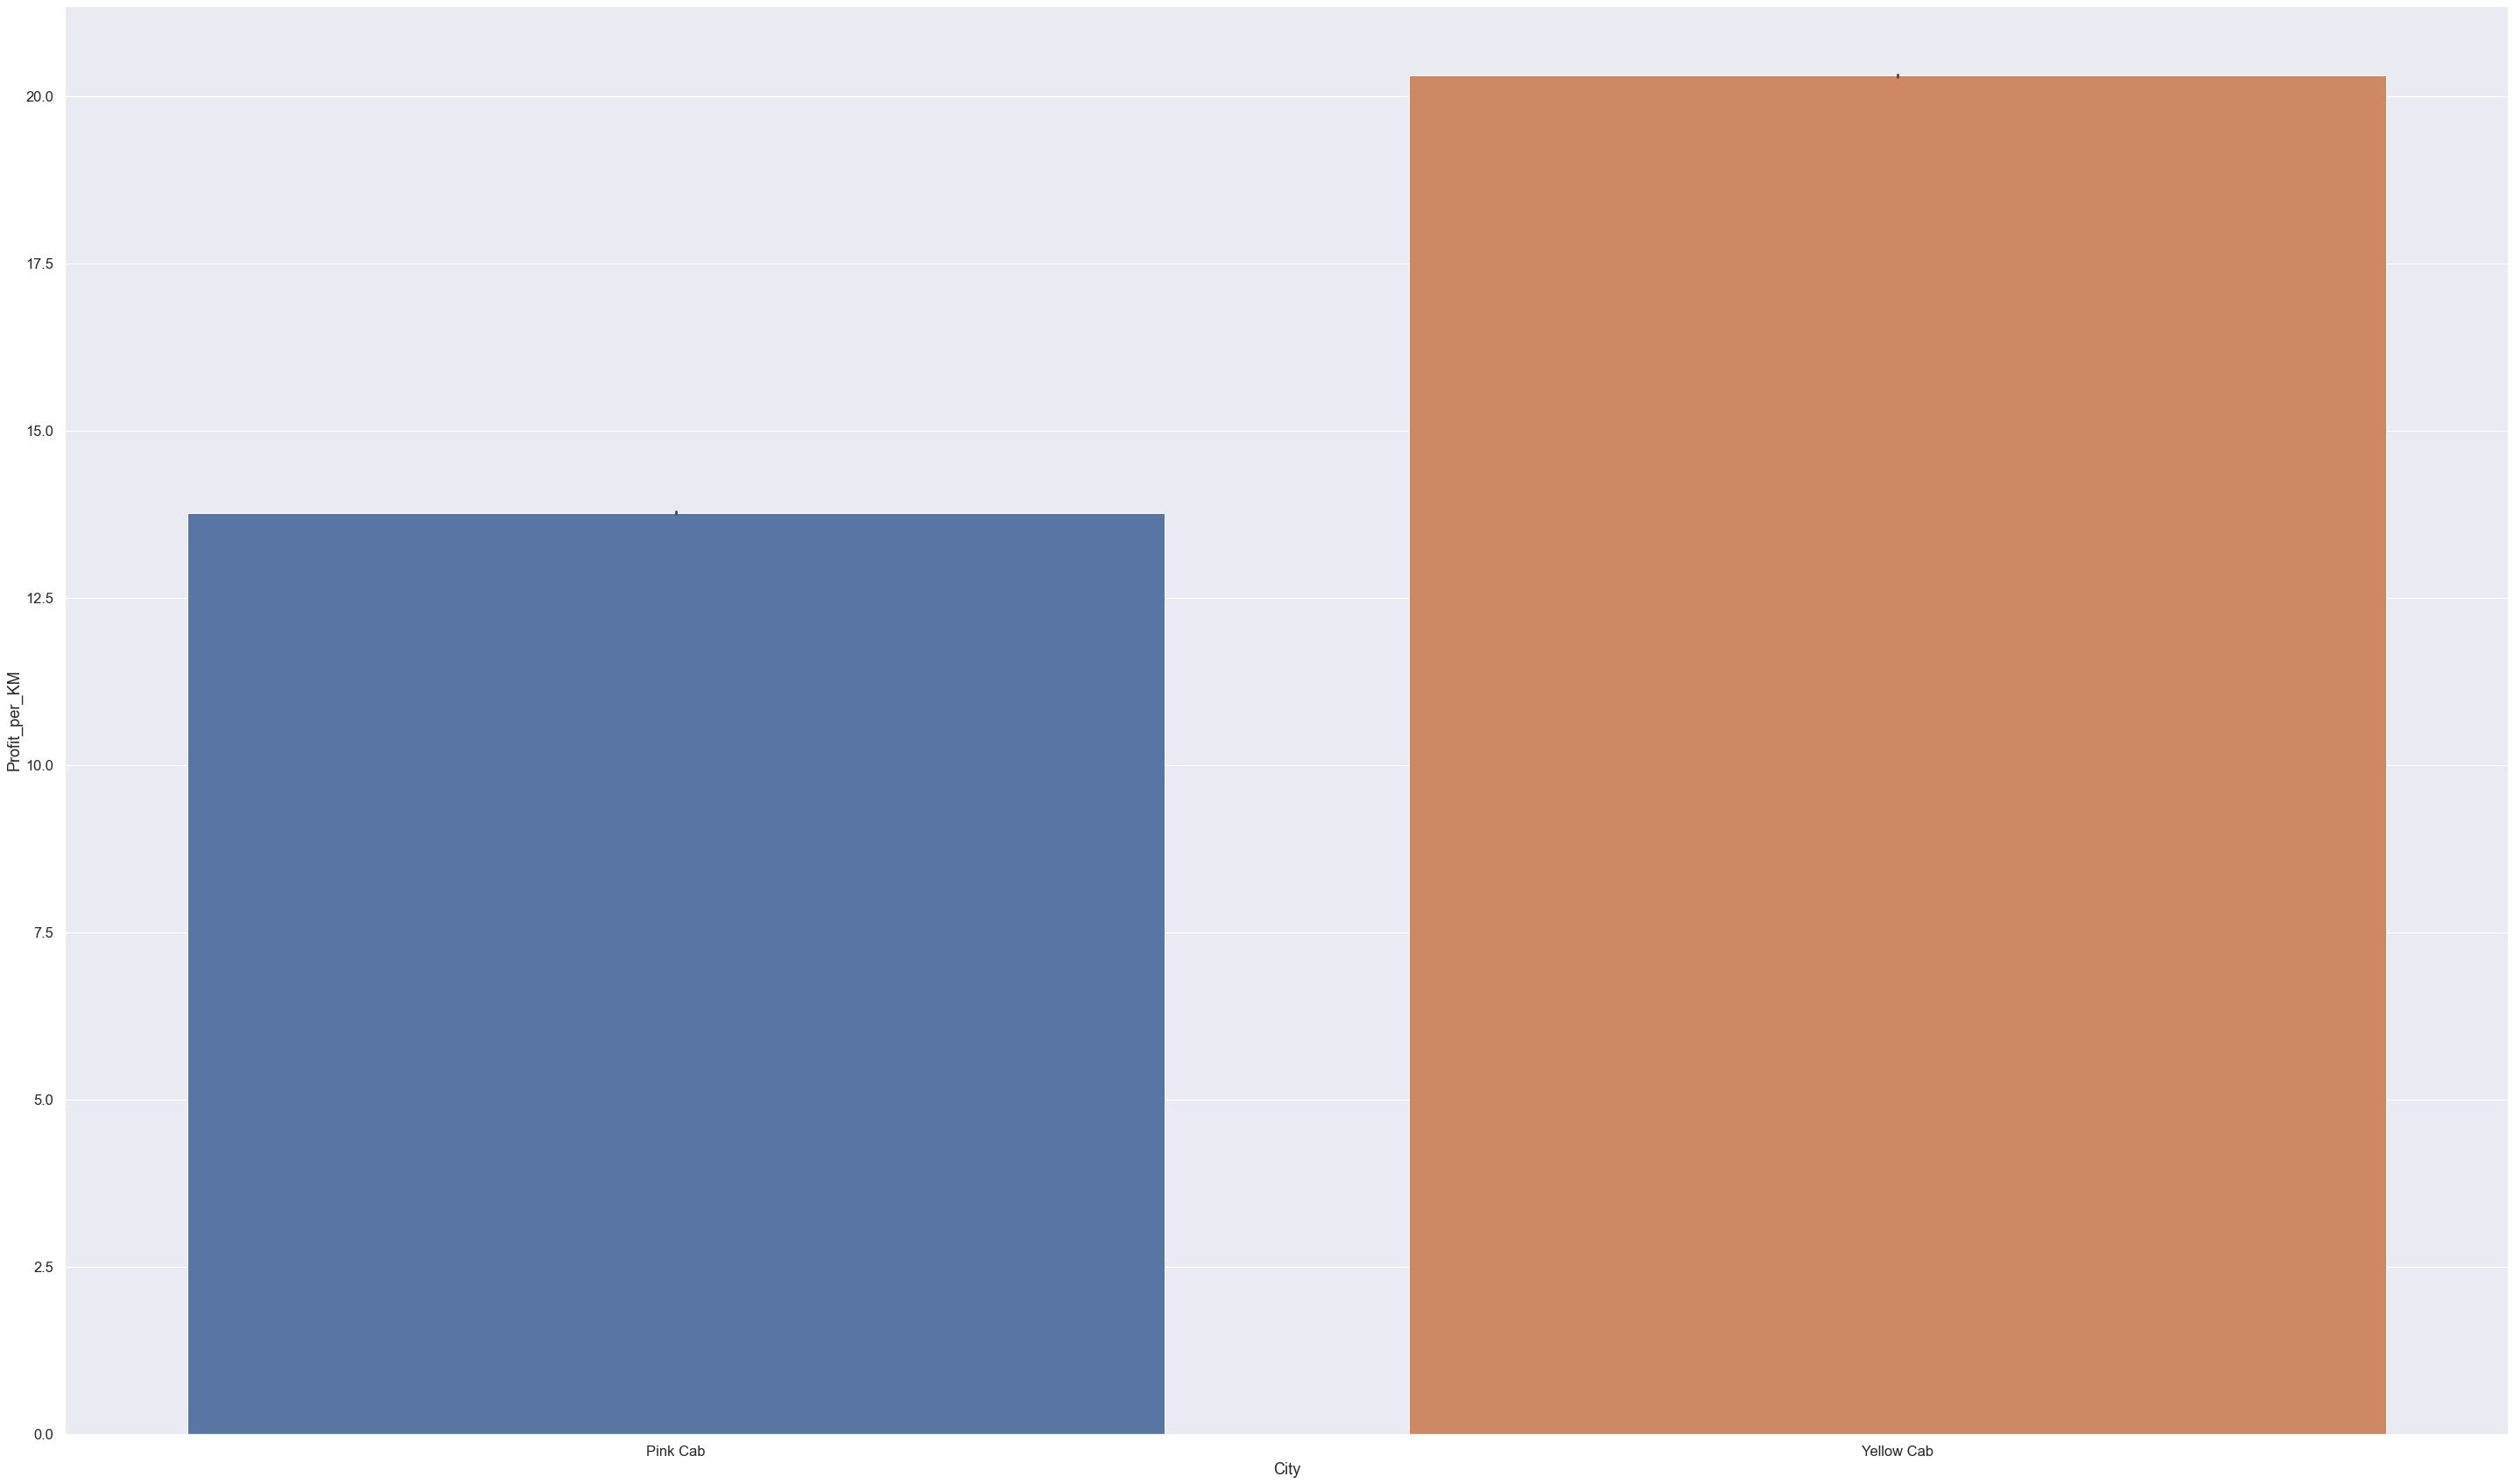

In [21]:
plt.figure(figsize = (50,30))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "Company", y = "Profit_per_KM", hue = None, dodge = False)
plt.xlabel("City")
plt.ylabel("Profit_per_KM")
plt.show()

### 3. Number of Transactions

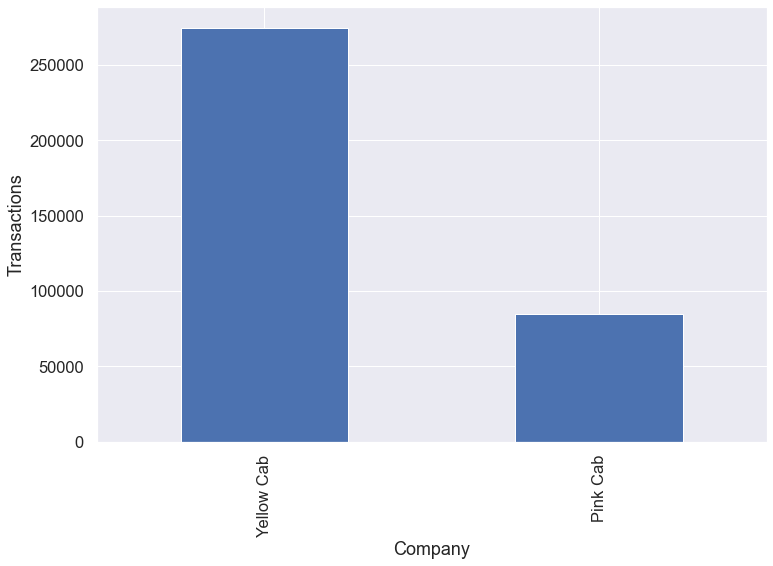

In [22]:
df["Company"].value_counts().plot(kind = 'bar', figsize=(12,8))
plt.xlabel("Company")
plt.ylabel("Transactions")
plt.show()

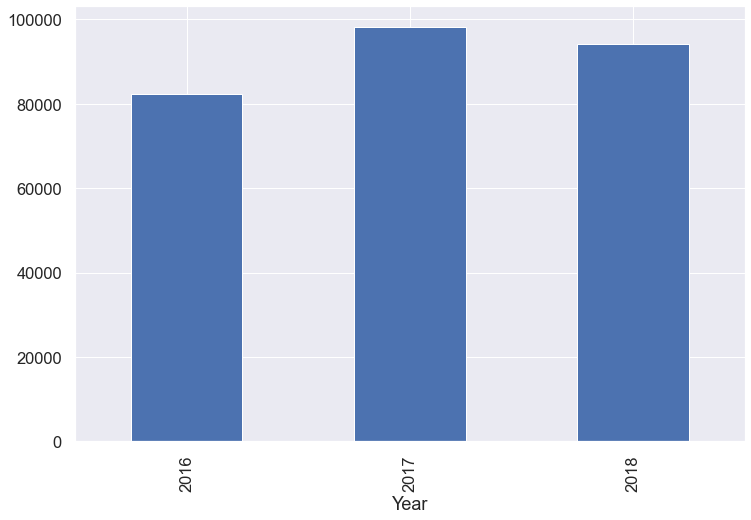

In [23]:
ycab.groupby(['Year']).Transaction_ID.count().plot(kind = 'bar', figsize=(12,8))

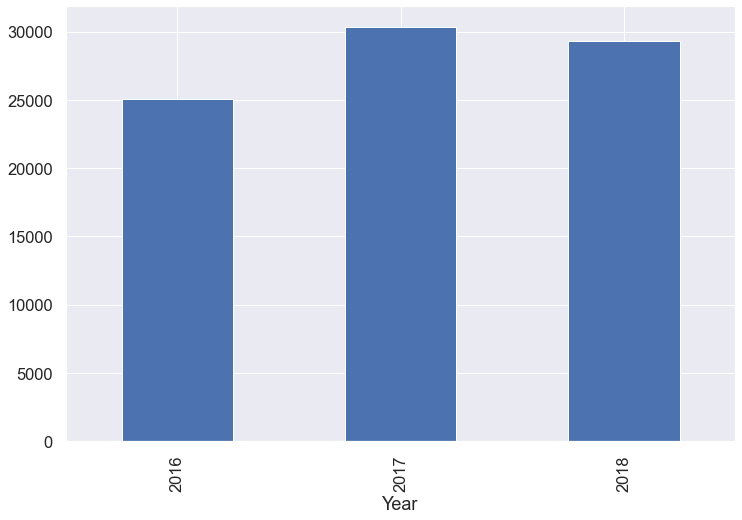

In [24]:
pcab.groupby(['Year']).Transaction_ID.count().plot(kind = 'bar', figsize=(12,8))

### 4. Profit by City

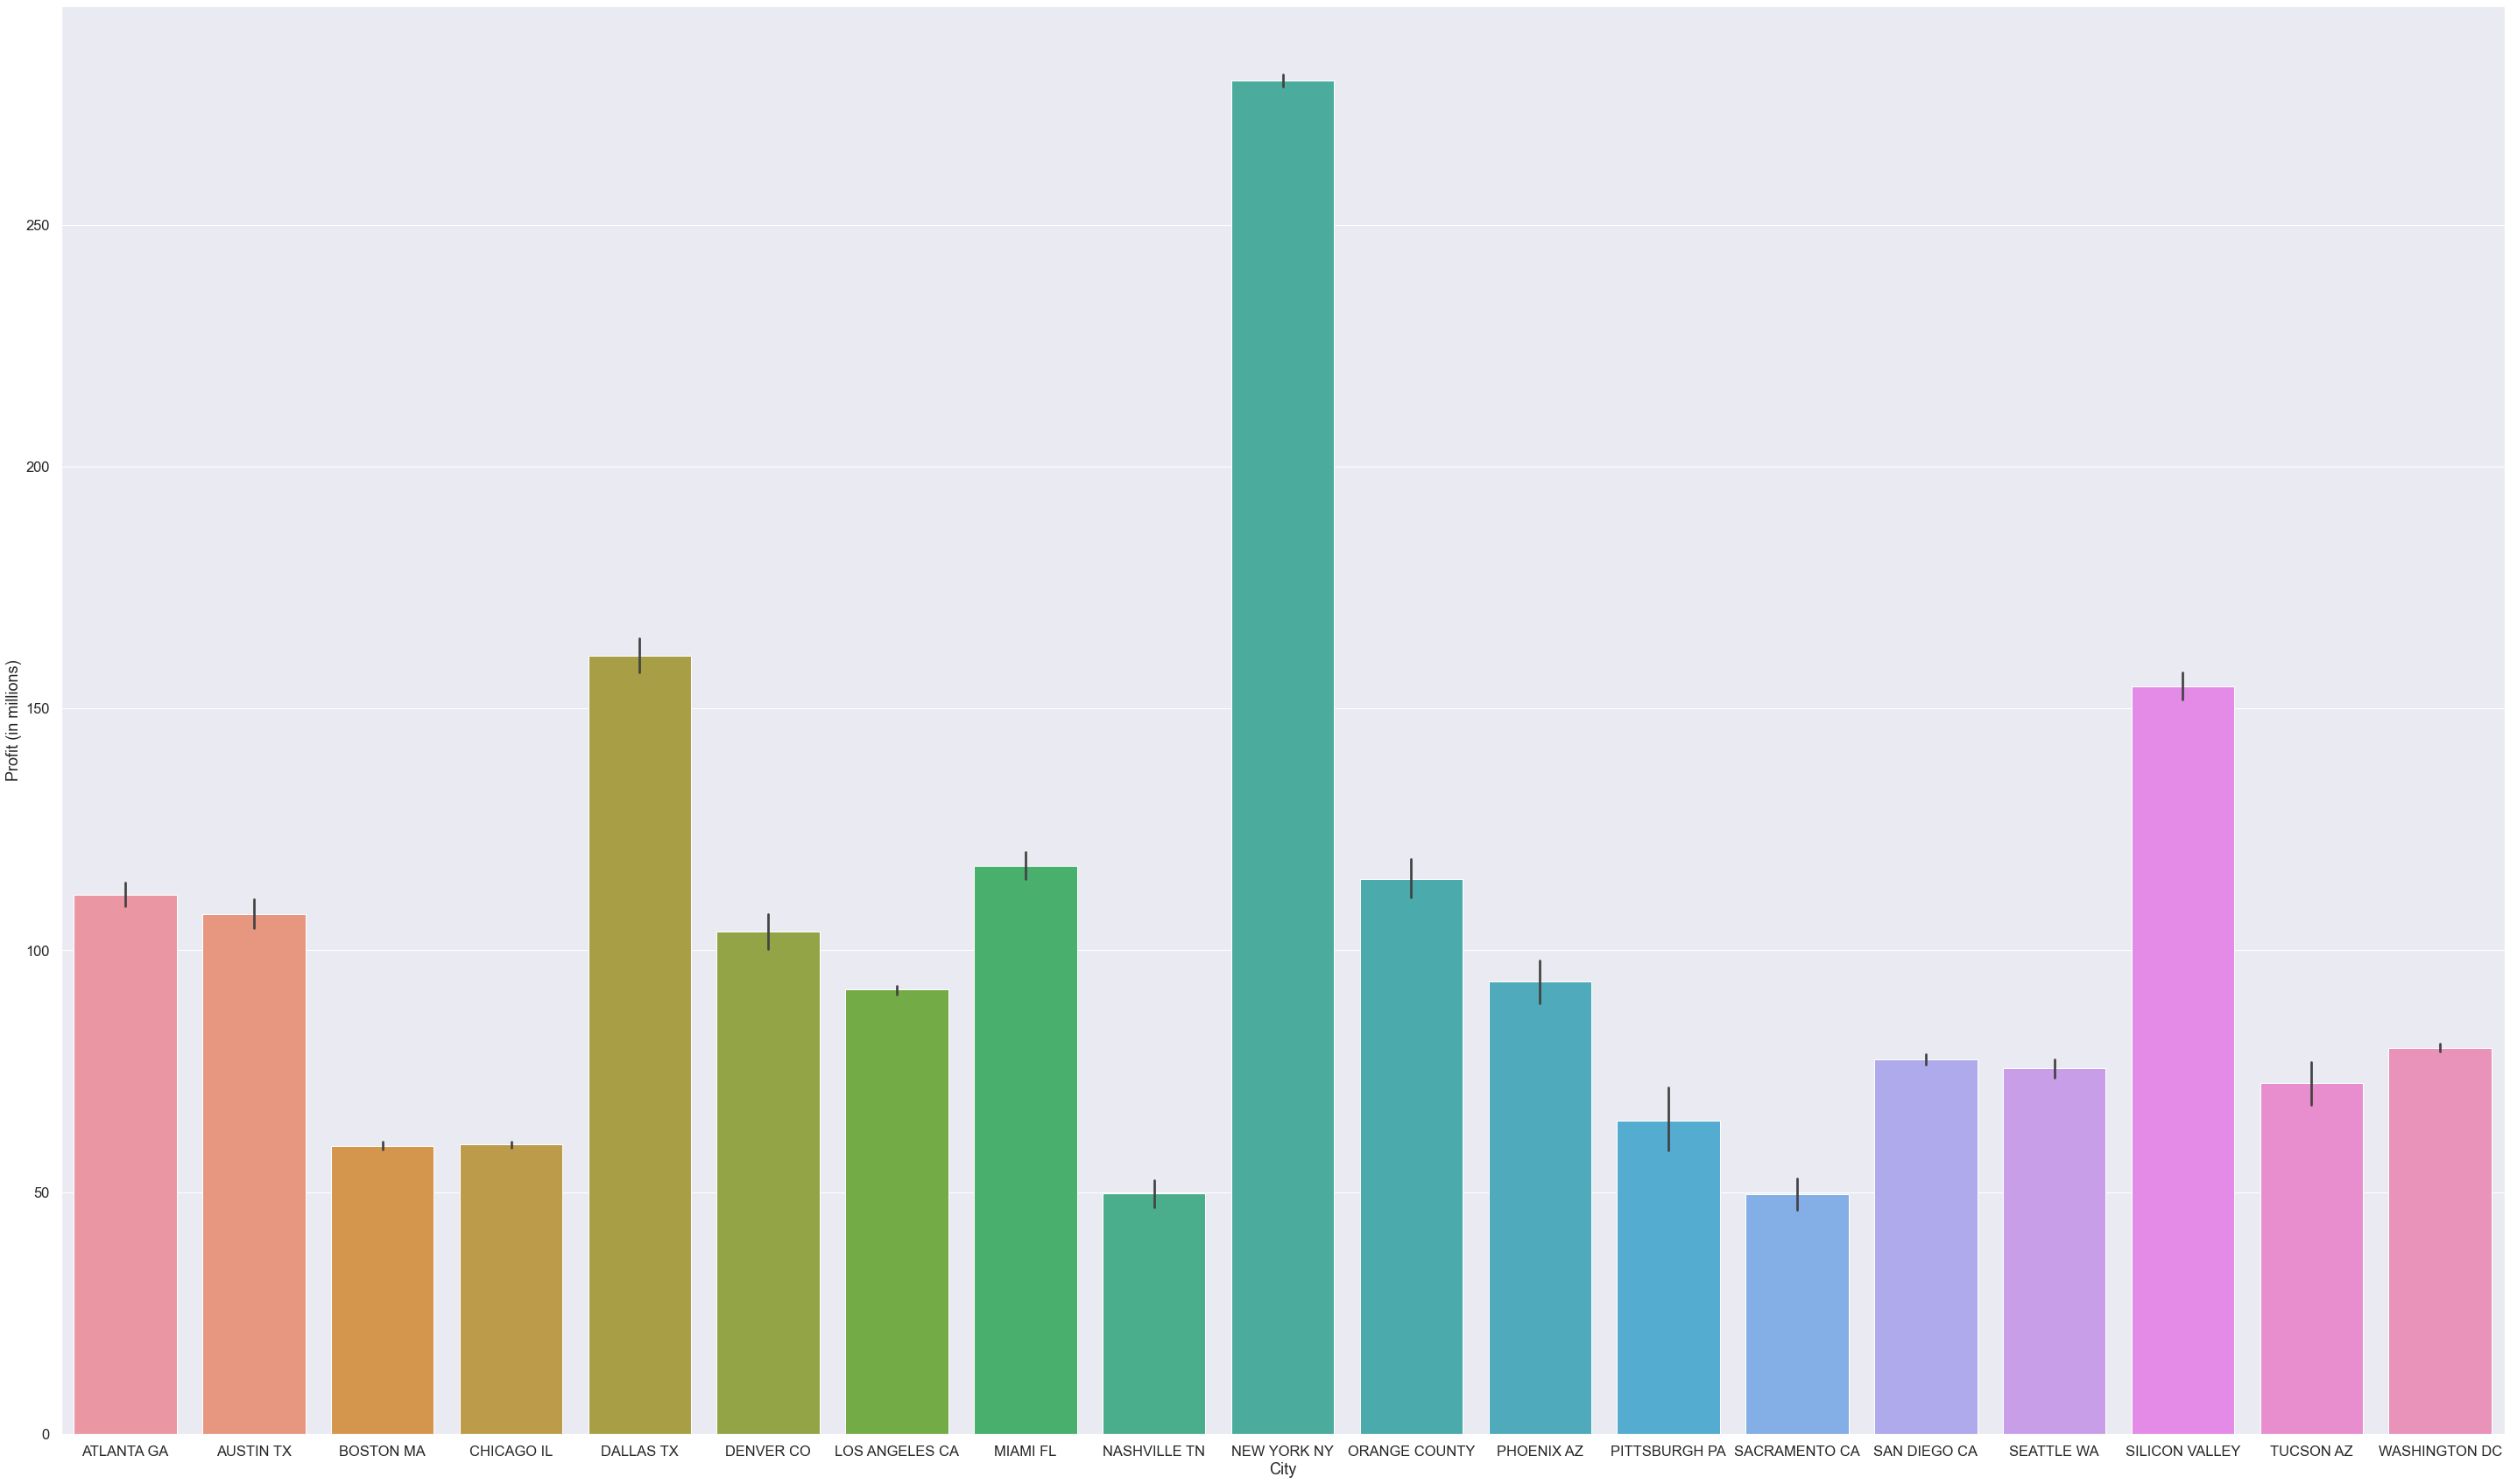

In [25]:
plt.figure(figsize = (50,30))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "City", y = "Profit", hue = None, dodge = False)
plt.xlabel("City")
plt.ylabel("Profit (in millions)")
plt.show()

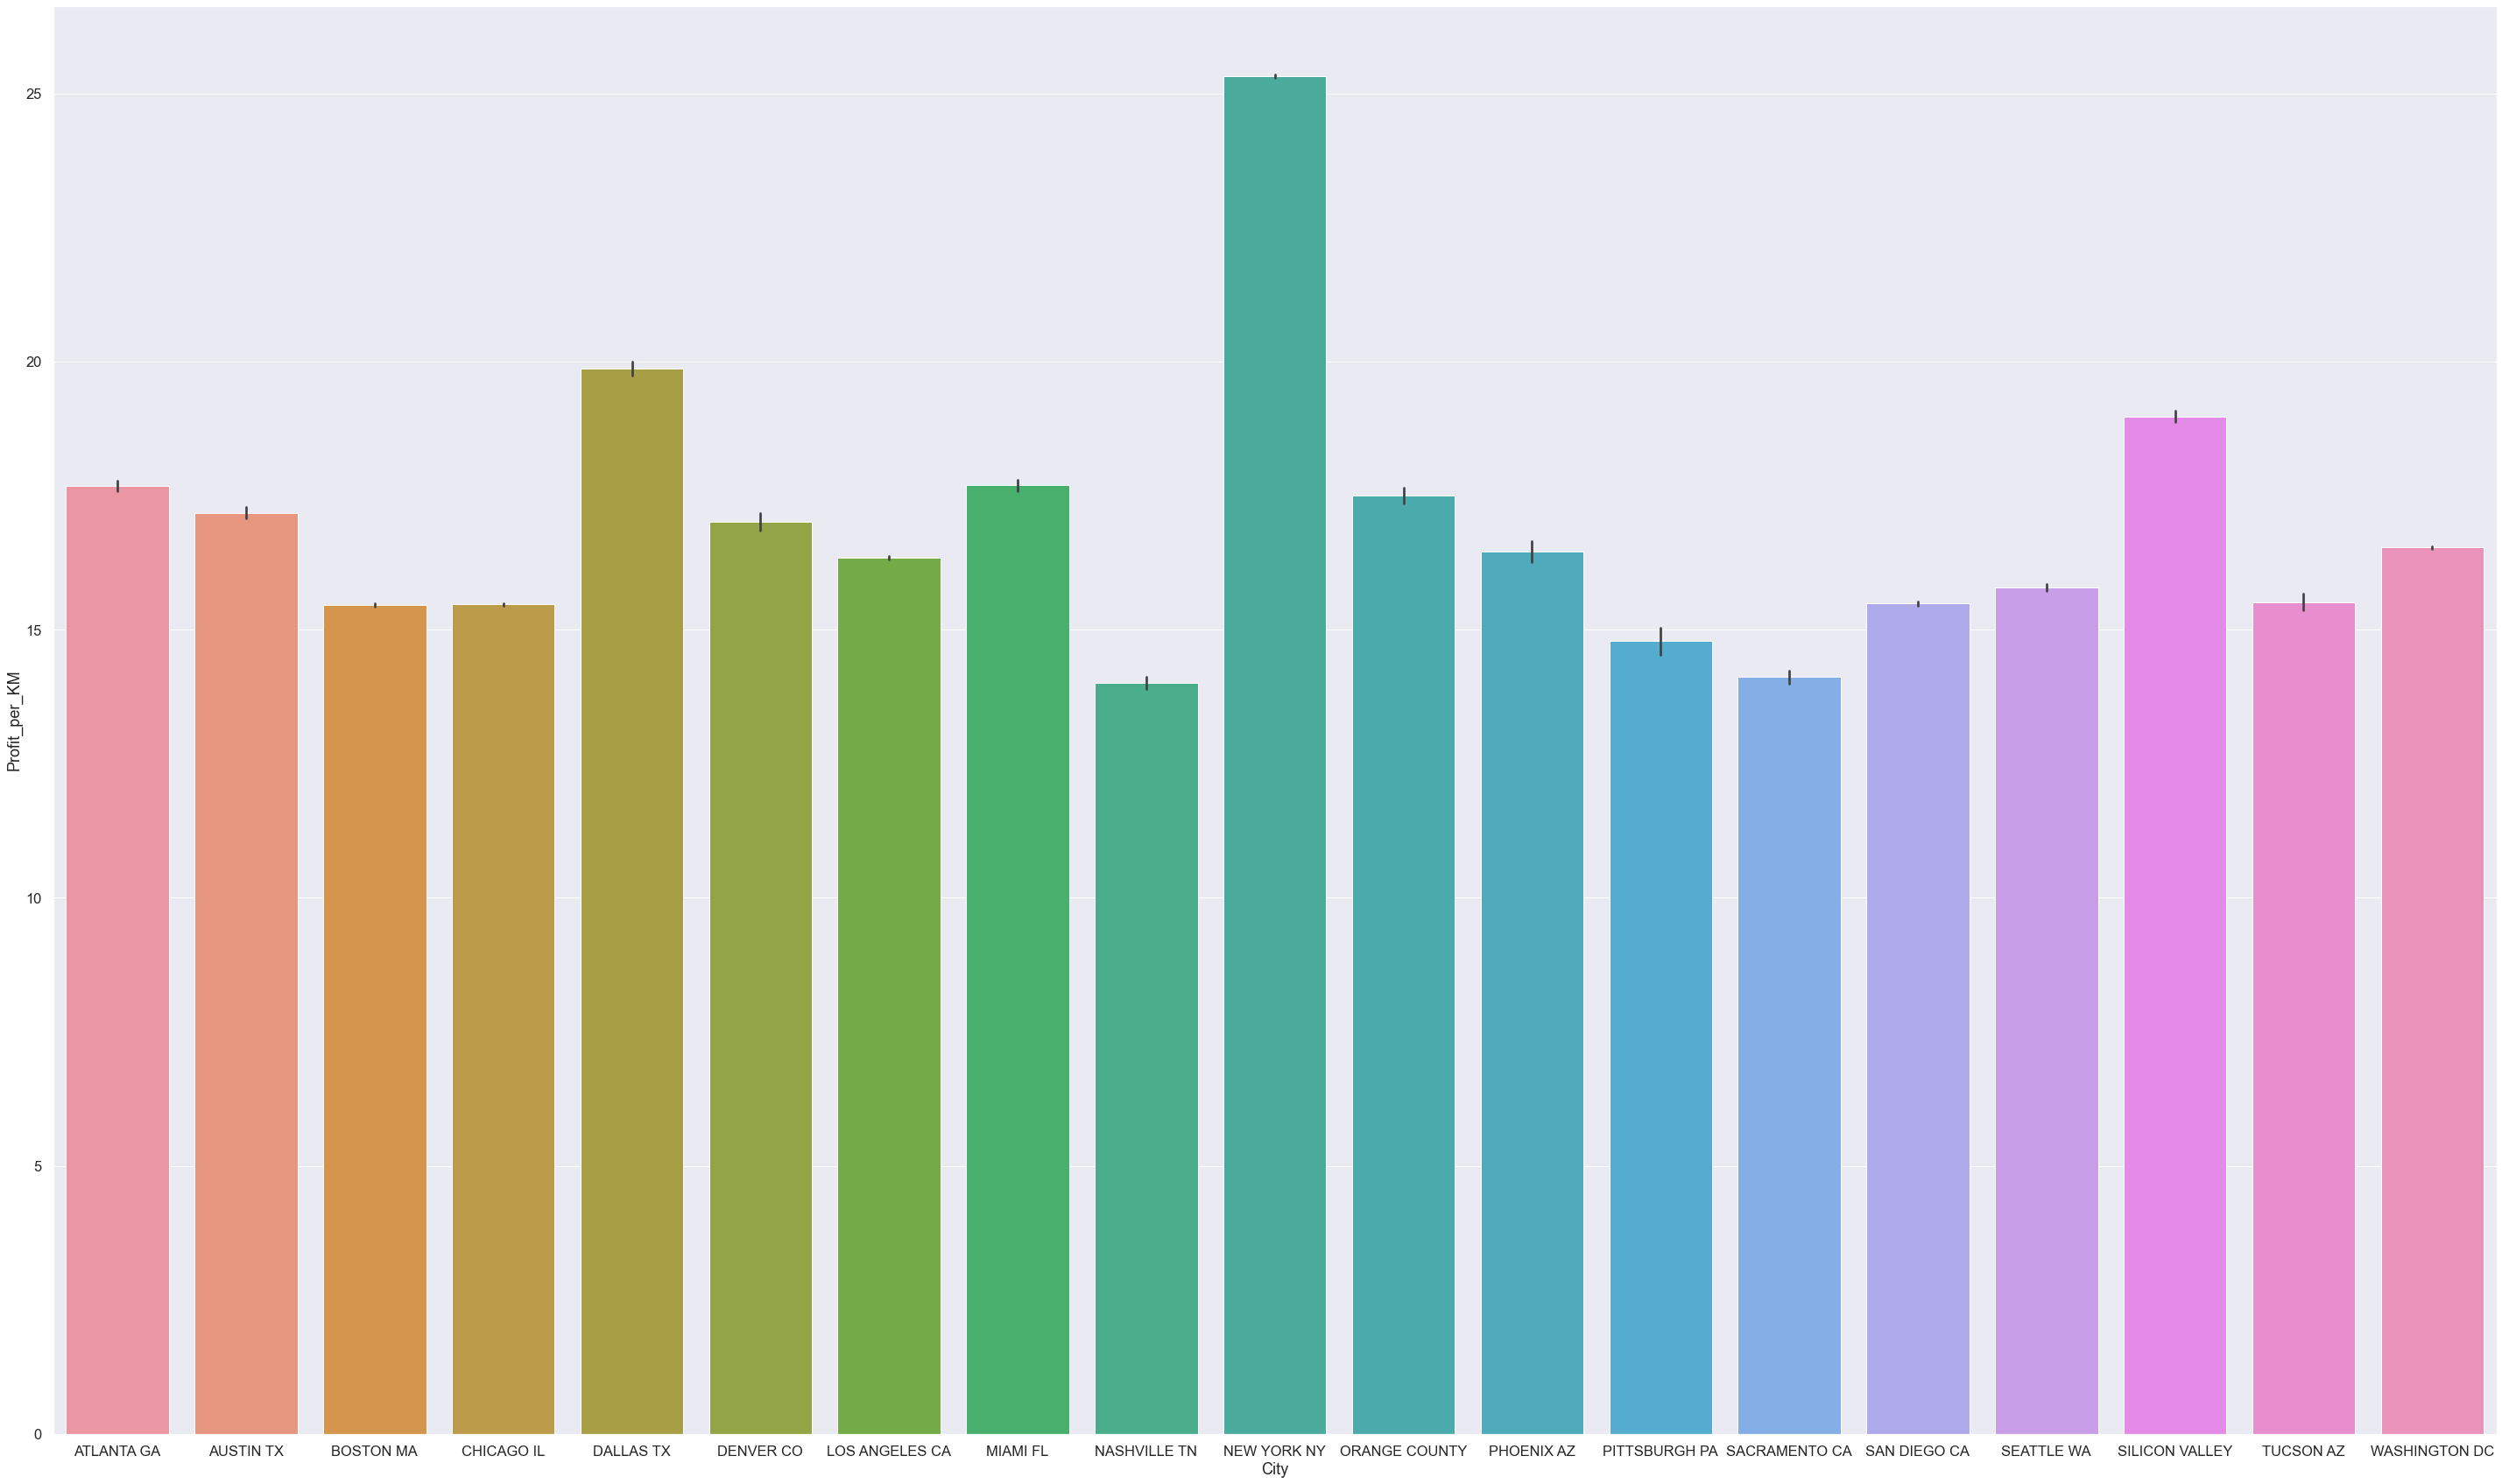

In [26]:
plt.figure(figsize = (50,30))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "City", y = "Profit_per_KM", hue = None, dodge = False)
plt.xlabel("City")
plt.ylabel("Profit_per_KM")
plt.show()

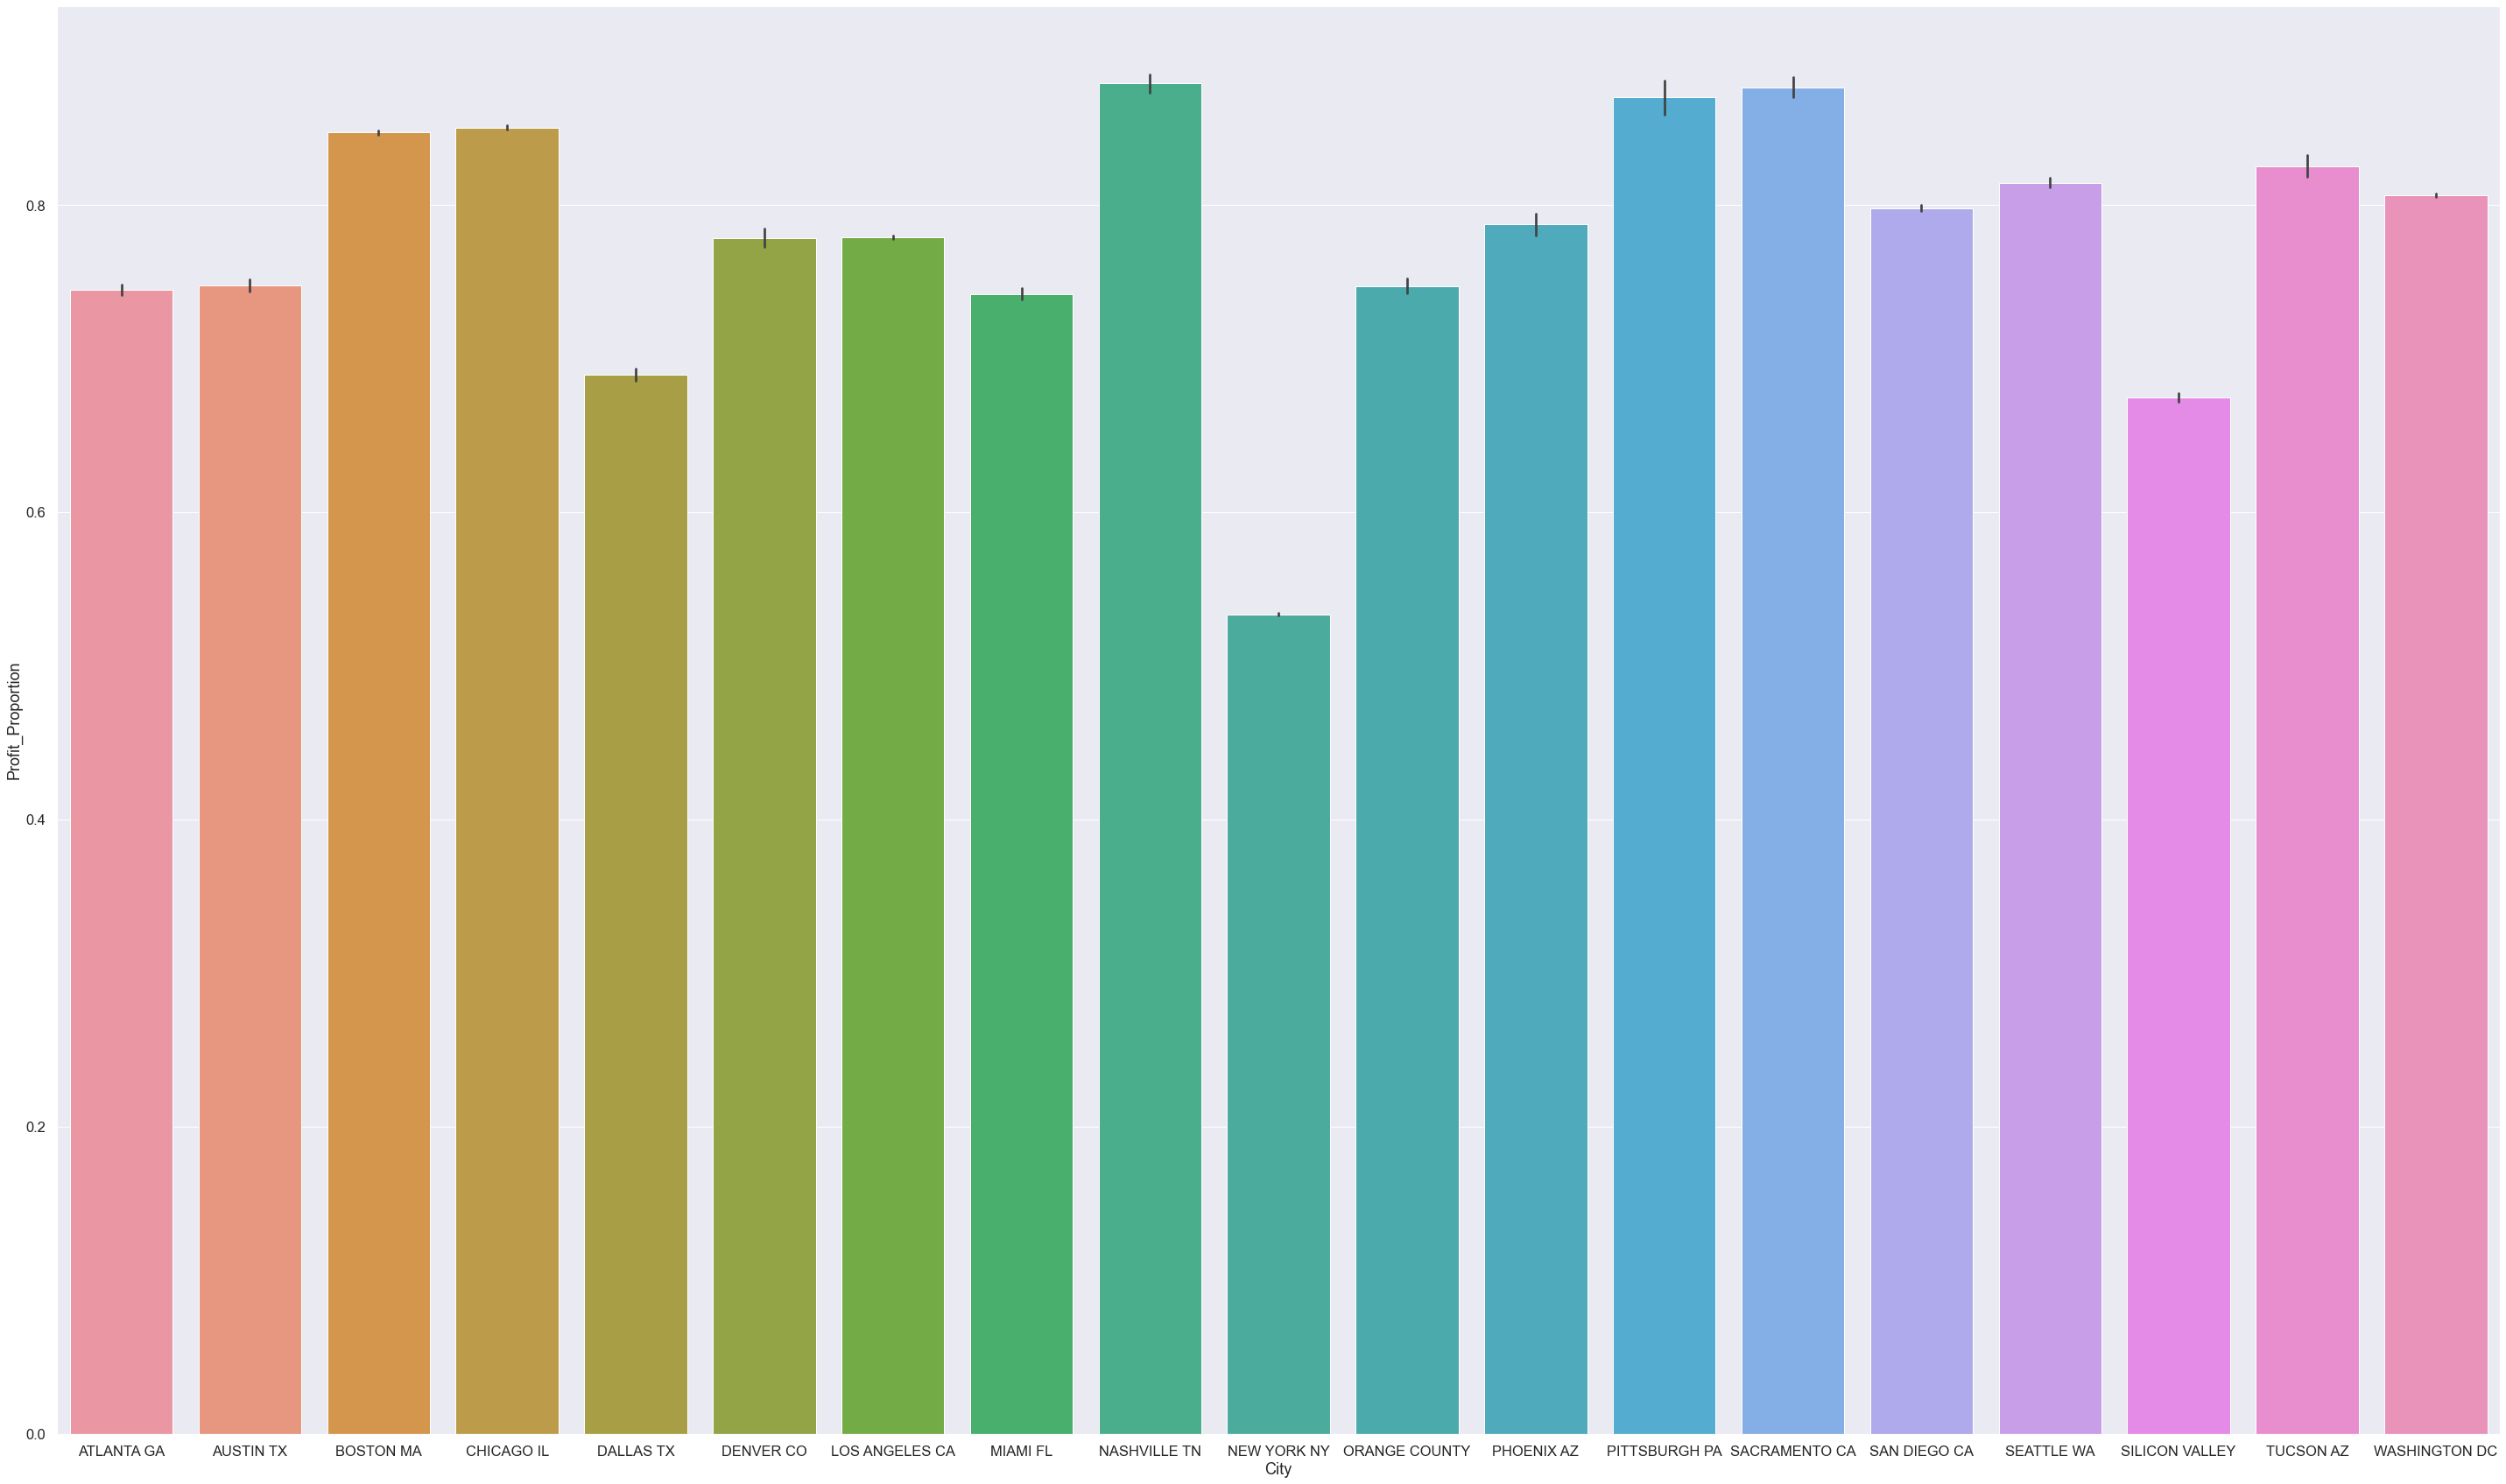

In [27]:
plt.figure(figsize = (50,30))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "City", y = "Profit_Proportion", hue = None, dodge = False)
plt.xlabel("City")
plt.ylabel("Profit_Proportion")
plt.show()

In [28]:
ycab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Profit,Profit_Proportion,Profit_per_KM
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,29290,Cash,Male,28,10813,814885.0,24701.0,281.2772,0.530187,22.859870
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885.0,24701.0,194.6480,0.754248,18.614571
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885.0,24701.0,253.9808,0.647787,19.821330
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,5,27703,Cash,Male,27,9237,814885.0,24701.0,50.8912,0.632289,22.394822
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,9,28712,Card,Male,53,11242,814885.0,24701.0,210.0920,0.701701,17.785354


Text(0.5, 1.0, 'Yellow Cab - Profit per KM')

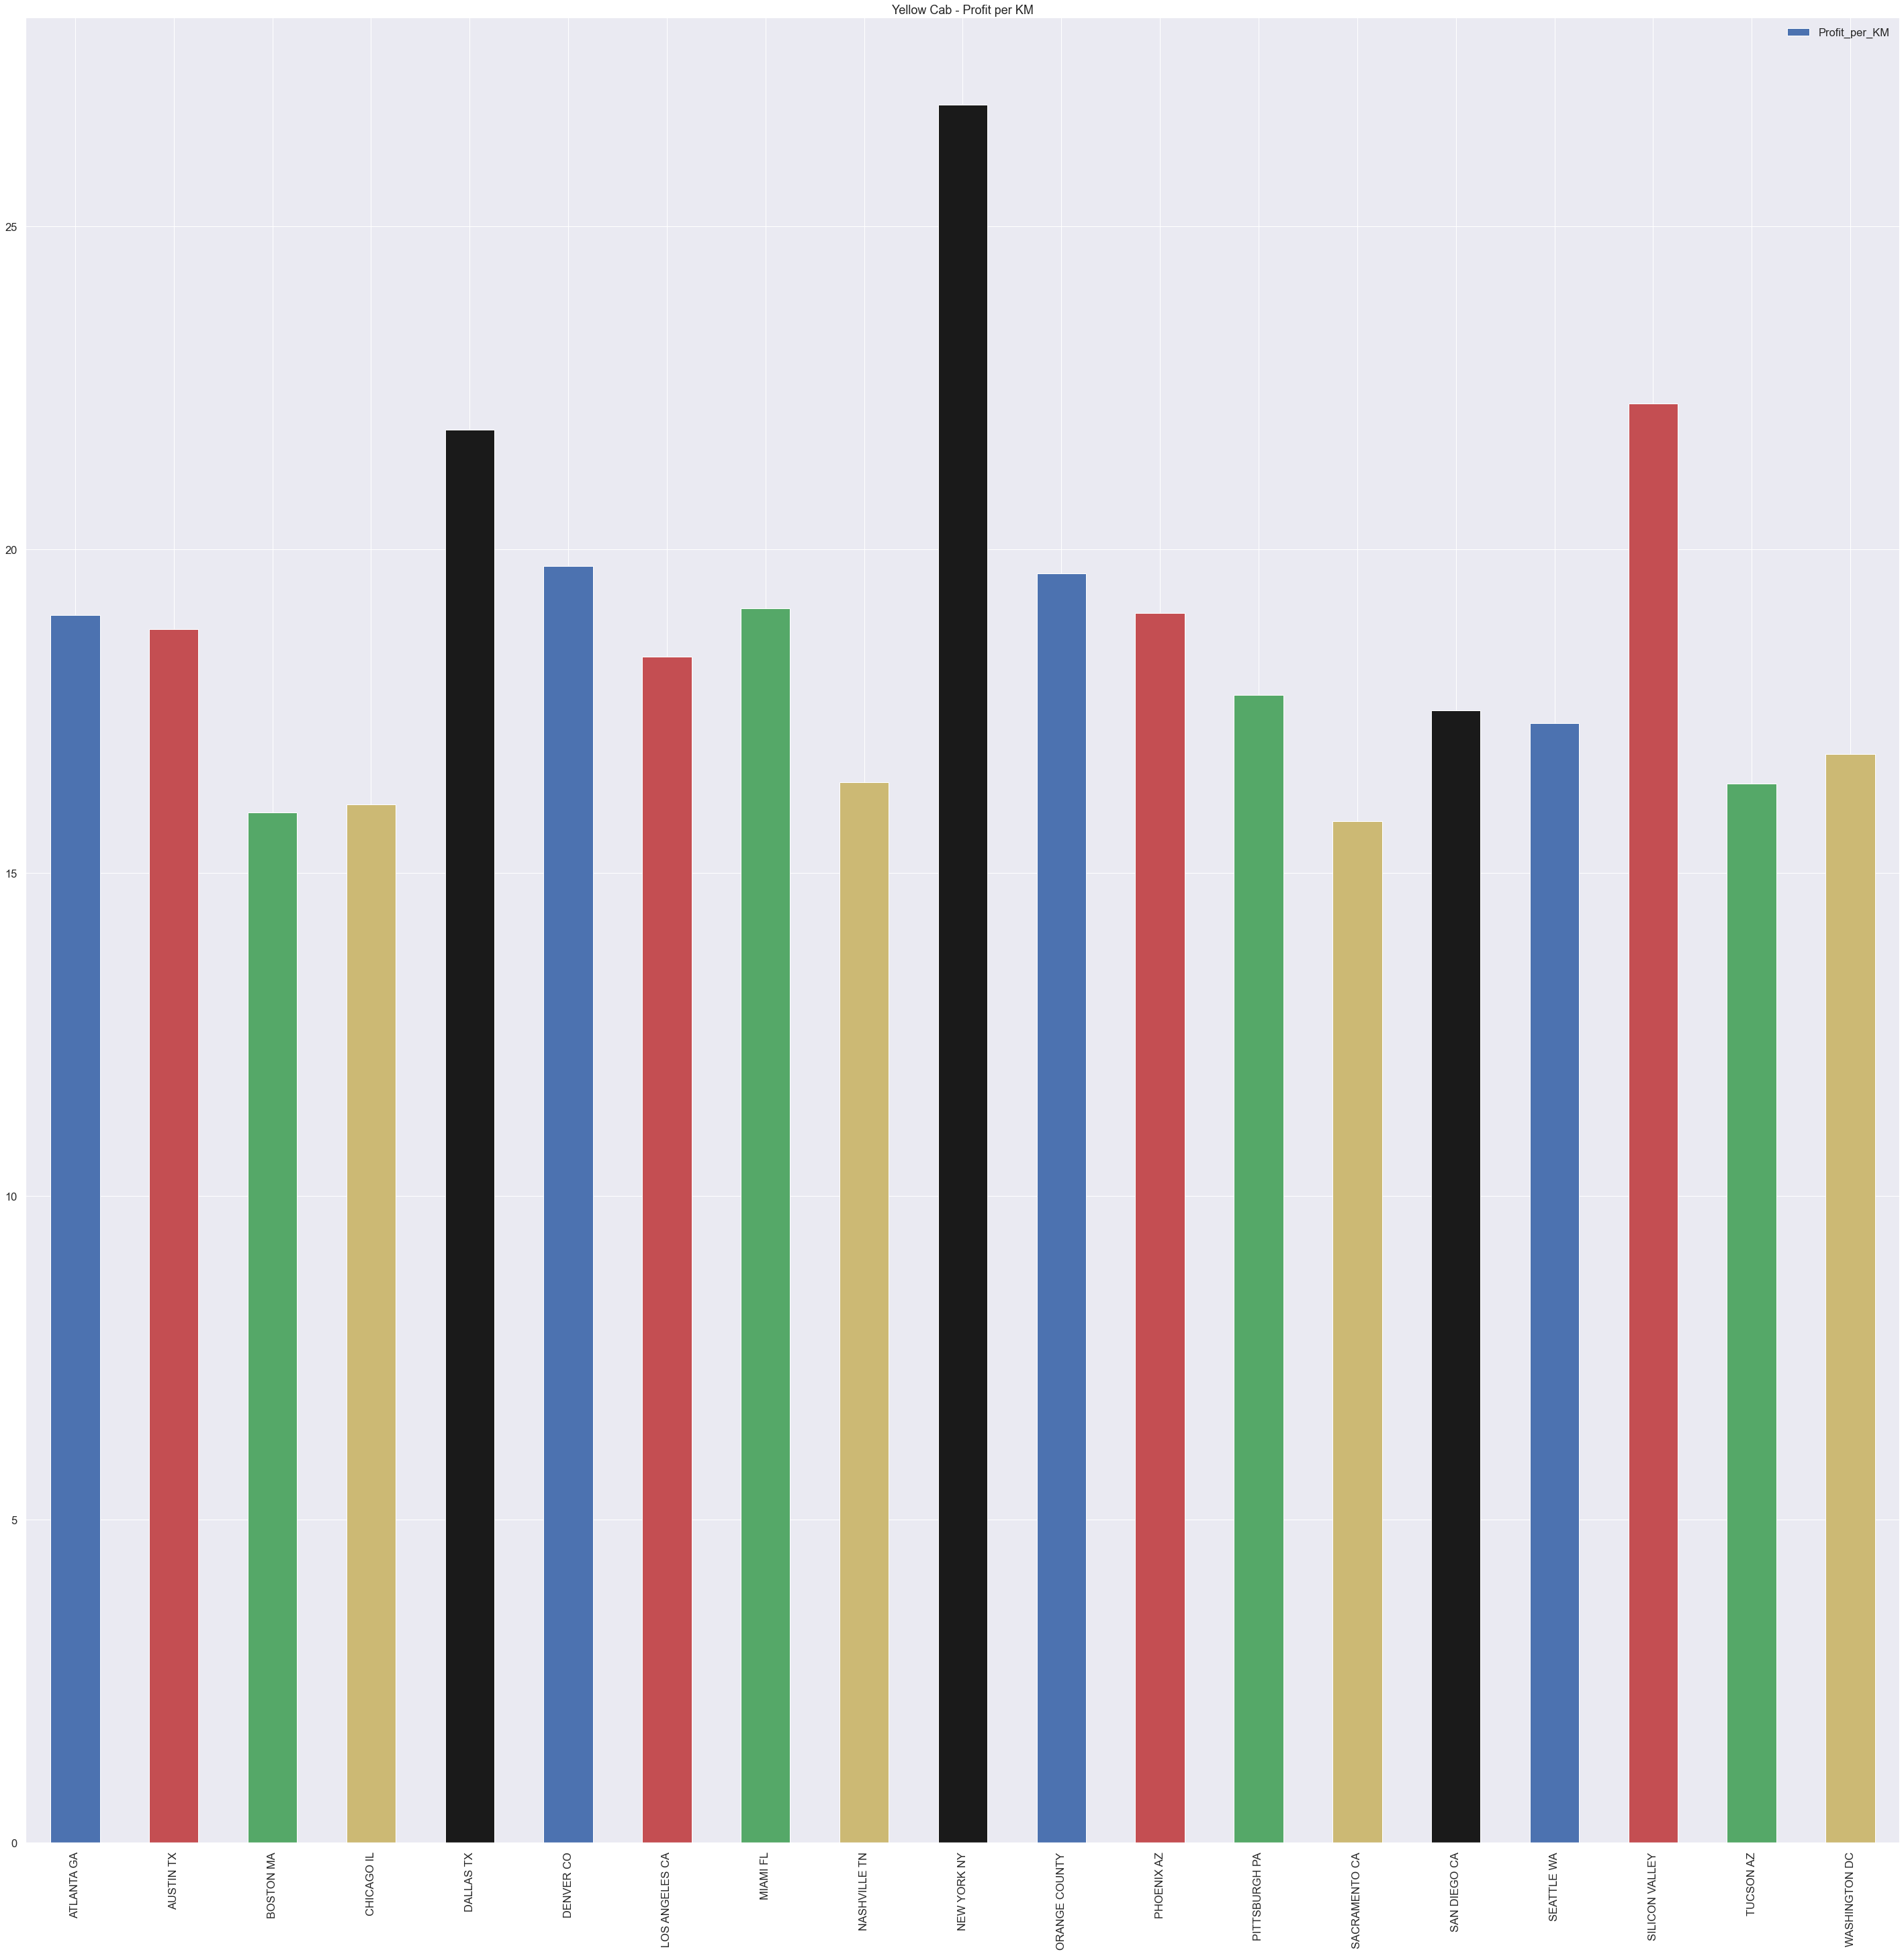

In [29]:
ycab.groupby('City').Profit_per_KM.mean().plot(kind = 'bar', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Yellow Cab - Profit per KM")

Text(0.5, 1.0, 'Pink Cab - Profit per KM')

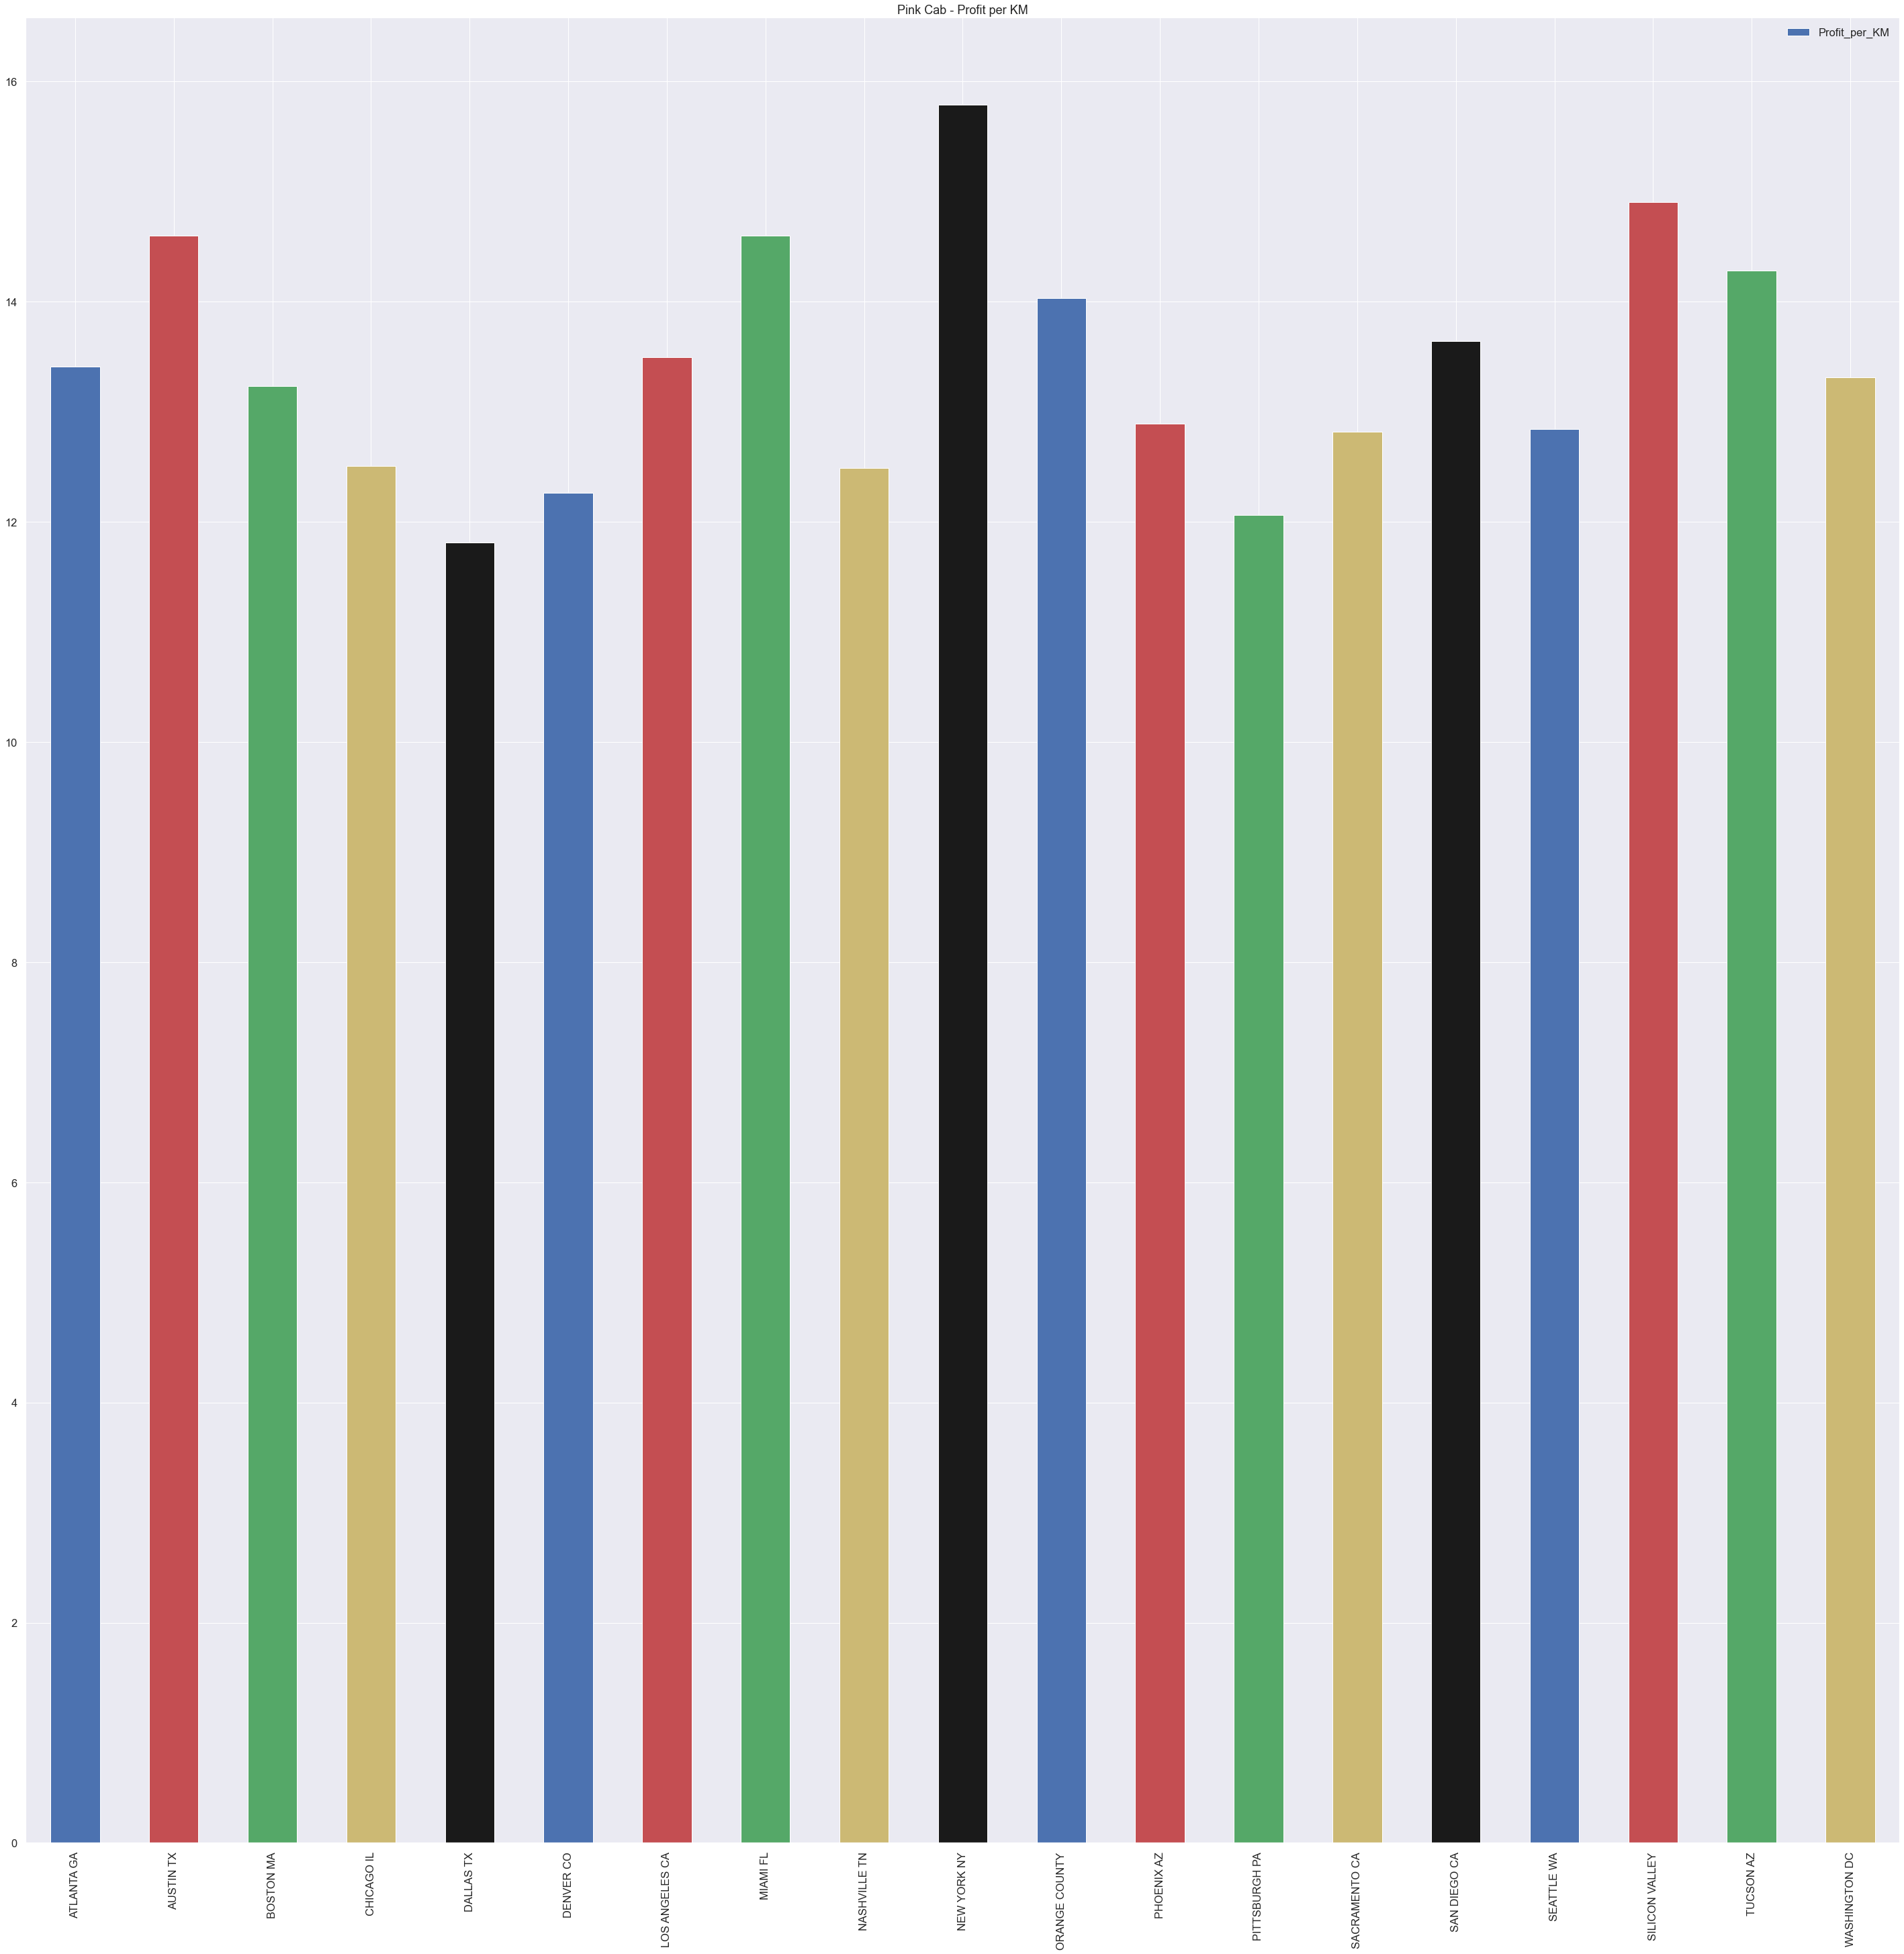

In [30]:
pcab.groupby('City').Profit_per_KM.mean().plot(kind = 'bar', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Pink Cab - Profit per KM")

Text(0.5, 1.0, 'Yellow Cab - Profit Proportioned per City')

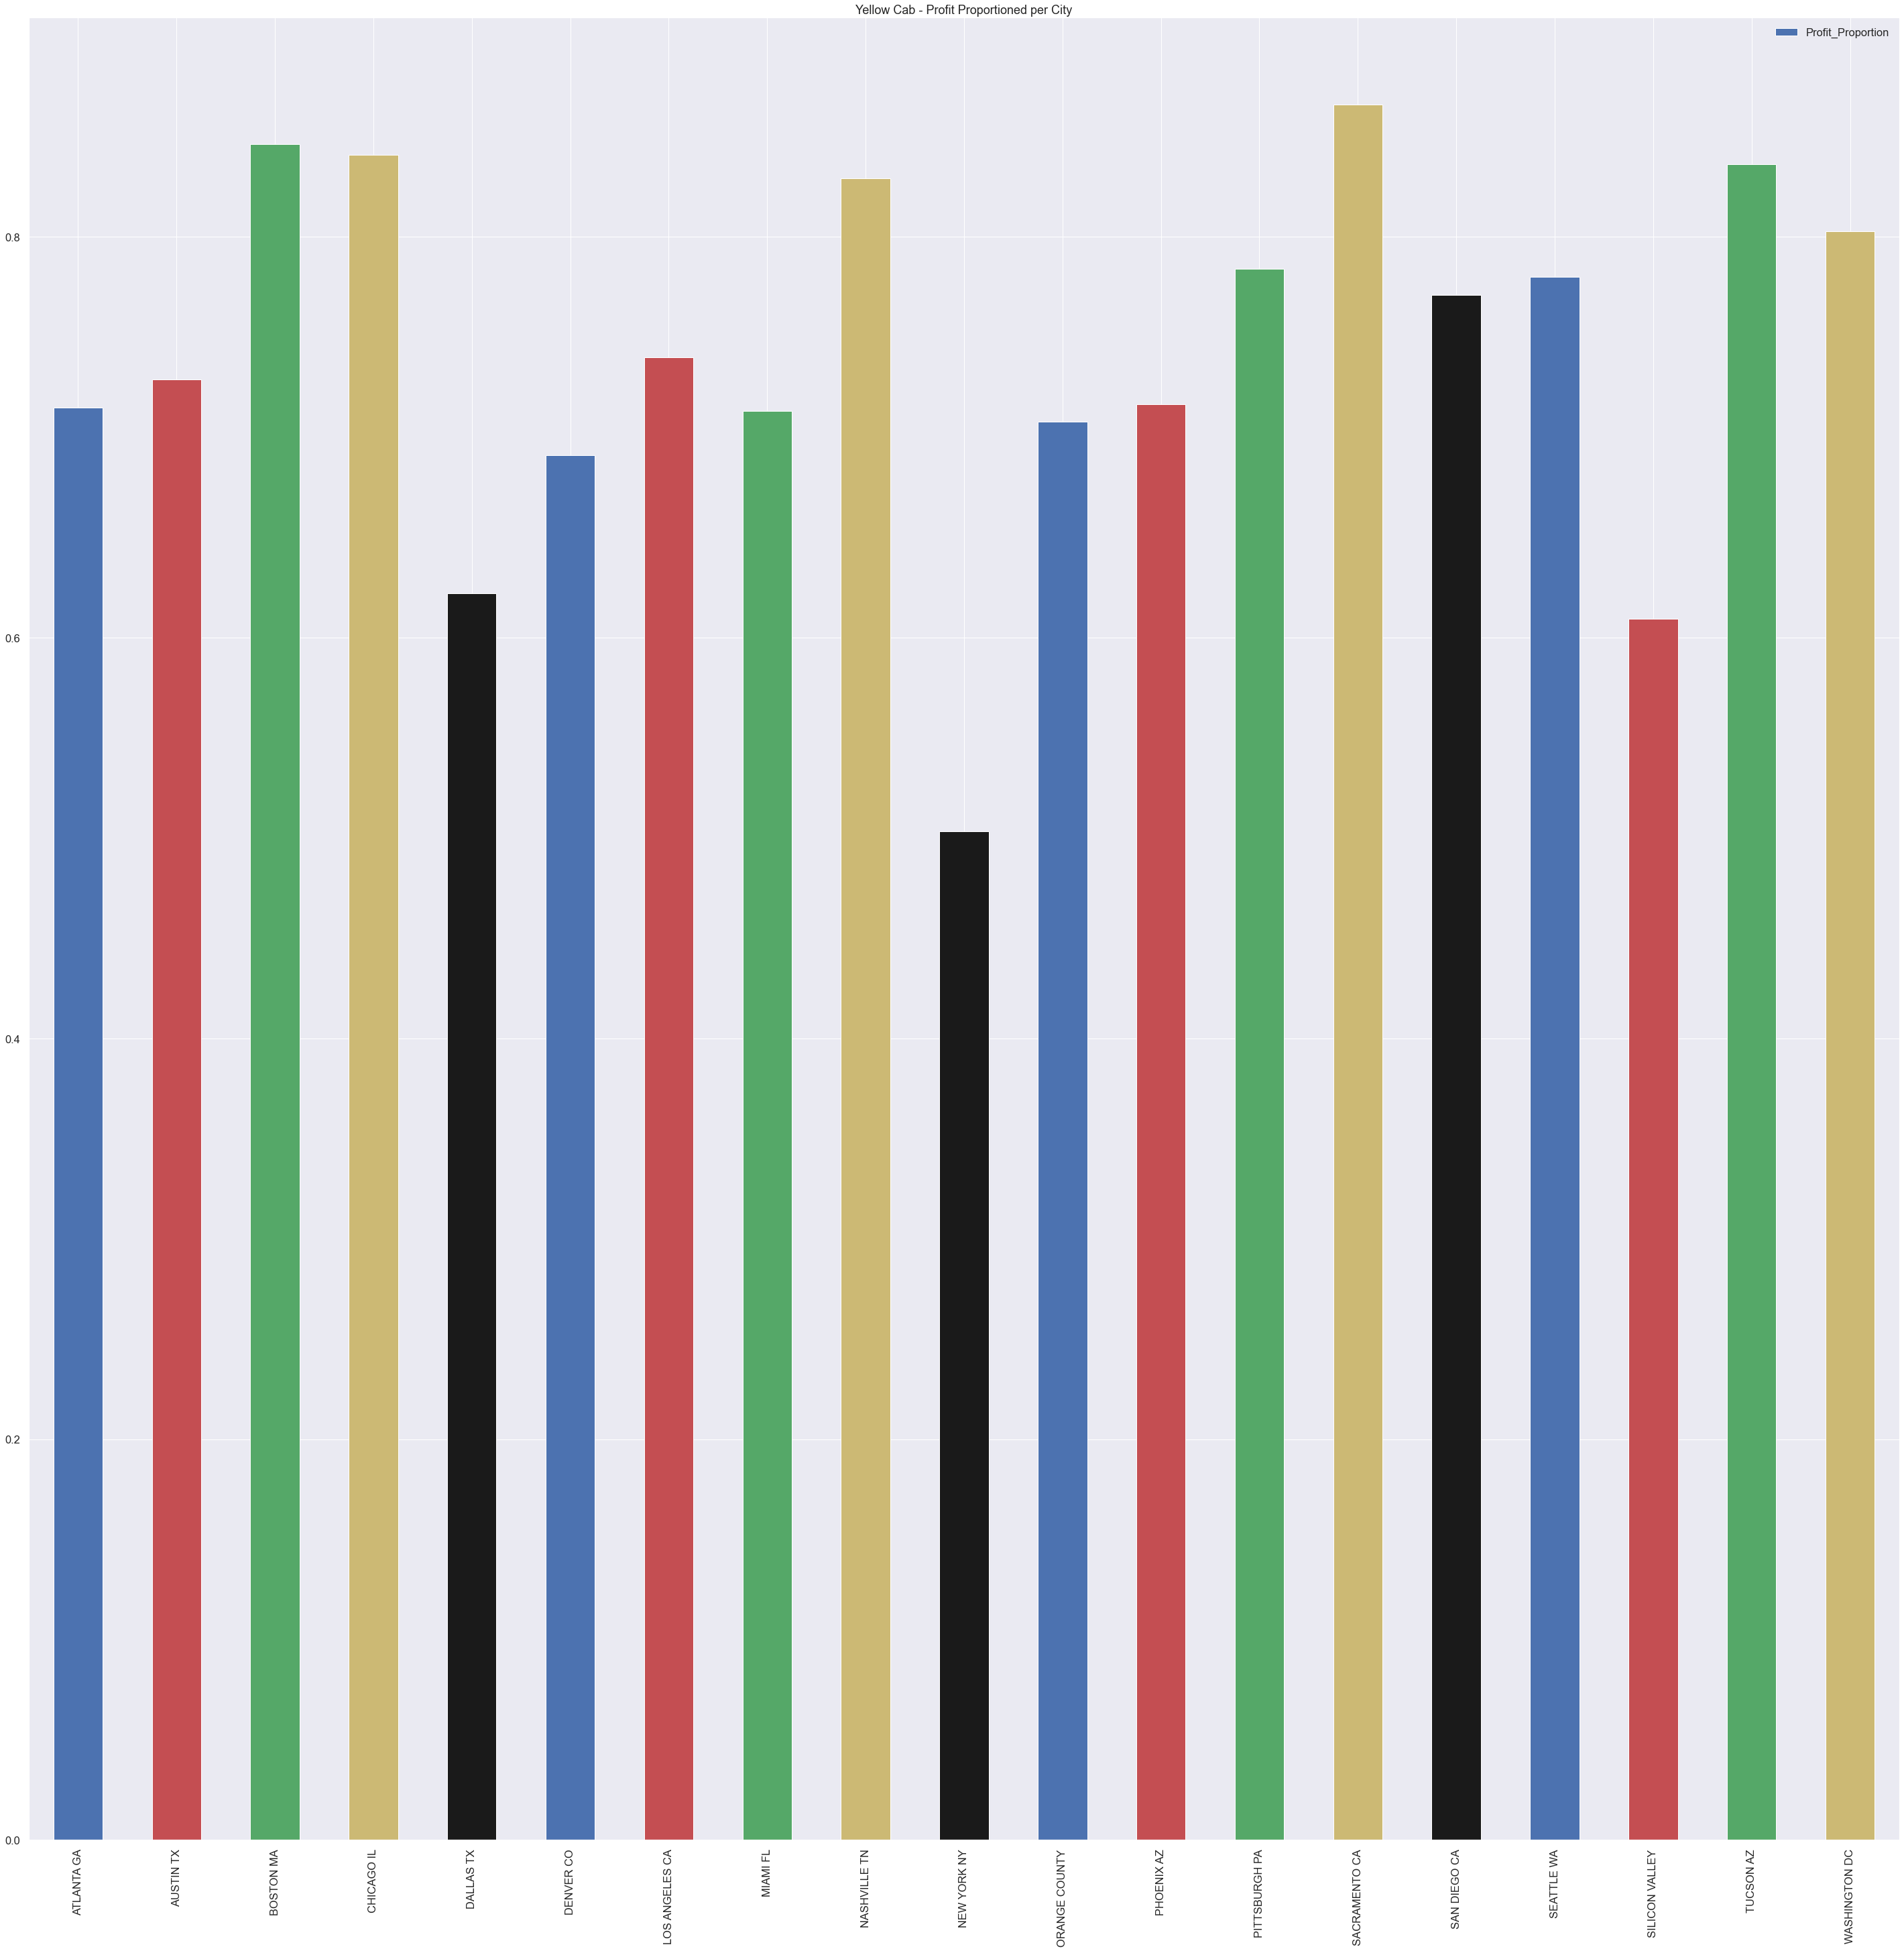

In [31]:
ycab.groupby(['City']).Profit_Proportion.mean().plot(kind = 'bar', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Yellow Cab - Profit Proportioned per City")

Text(0.5, 1.0, 'Pink Cab - Profit Proportioned per City')

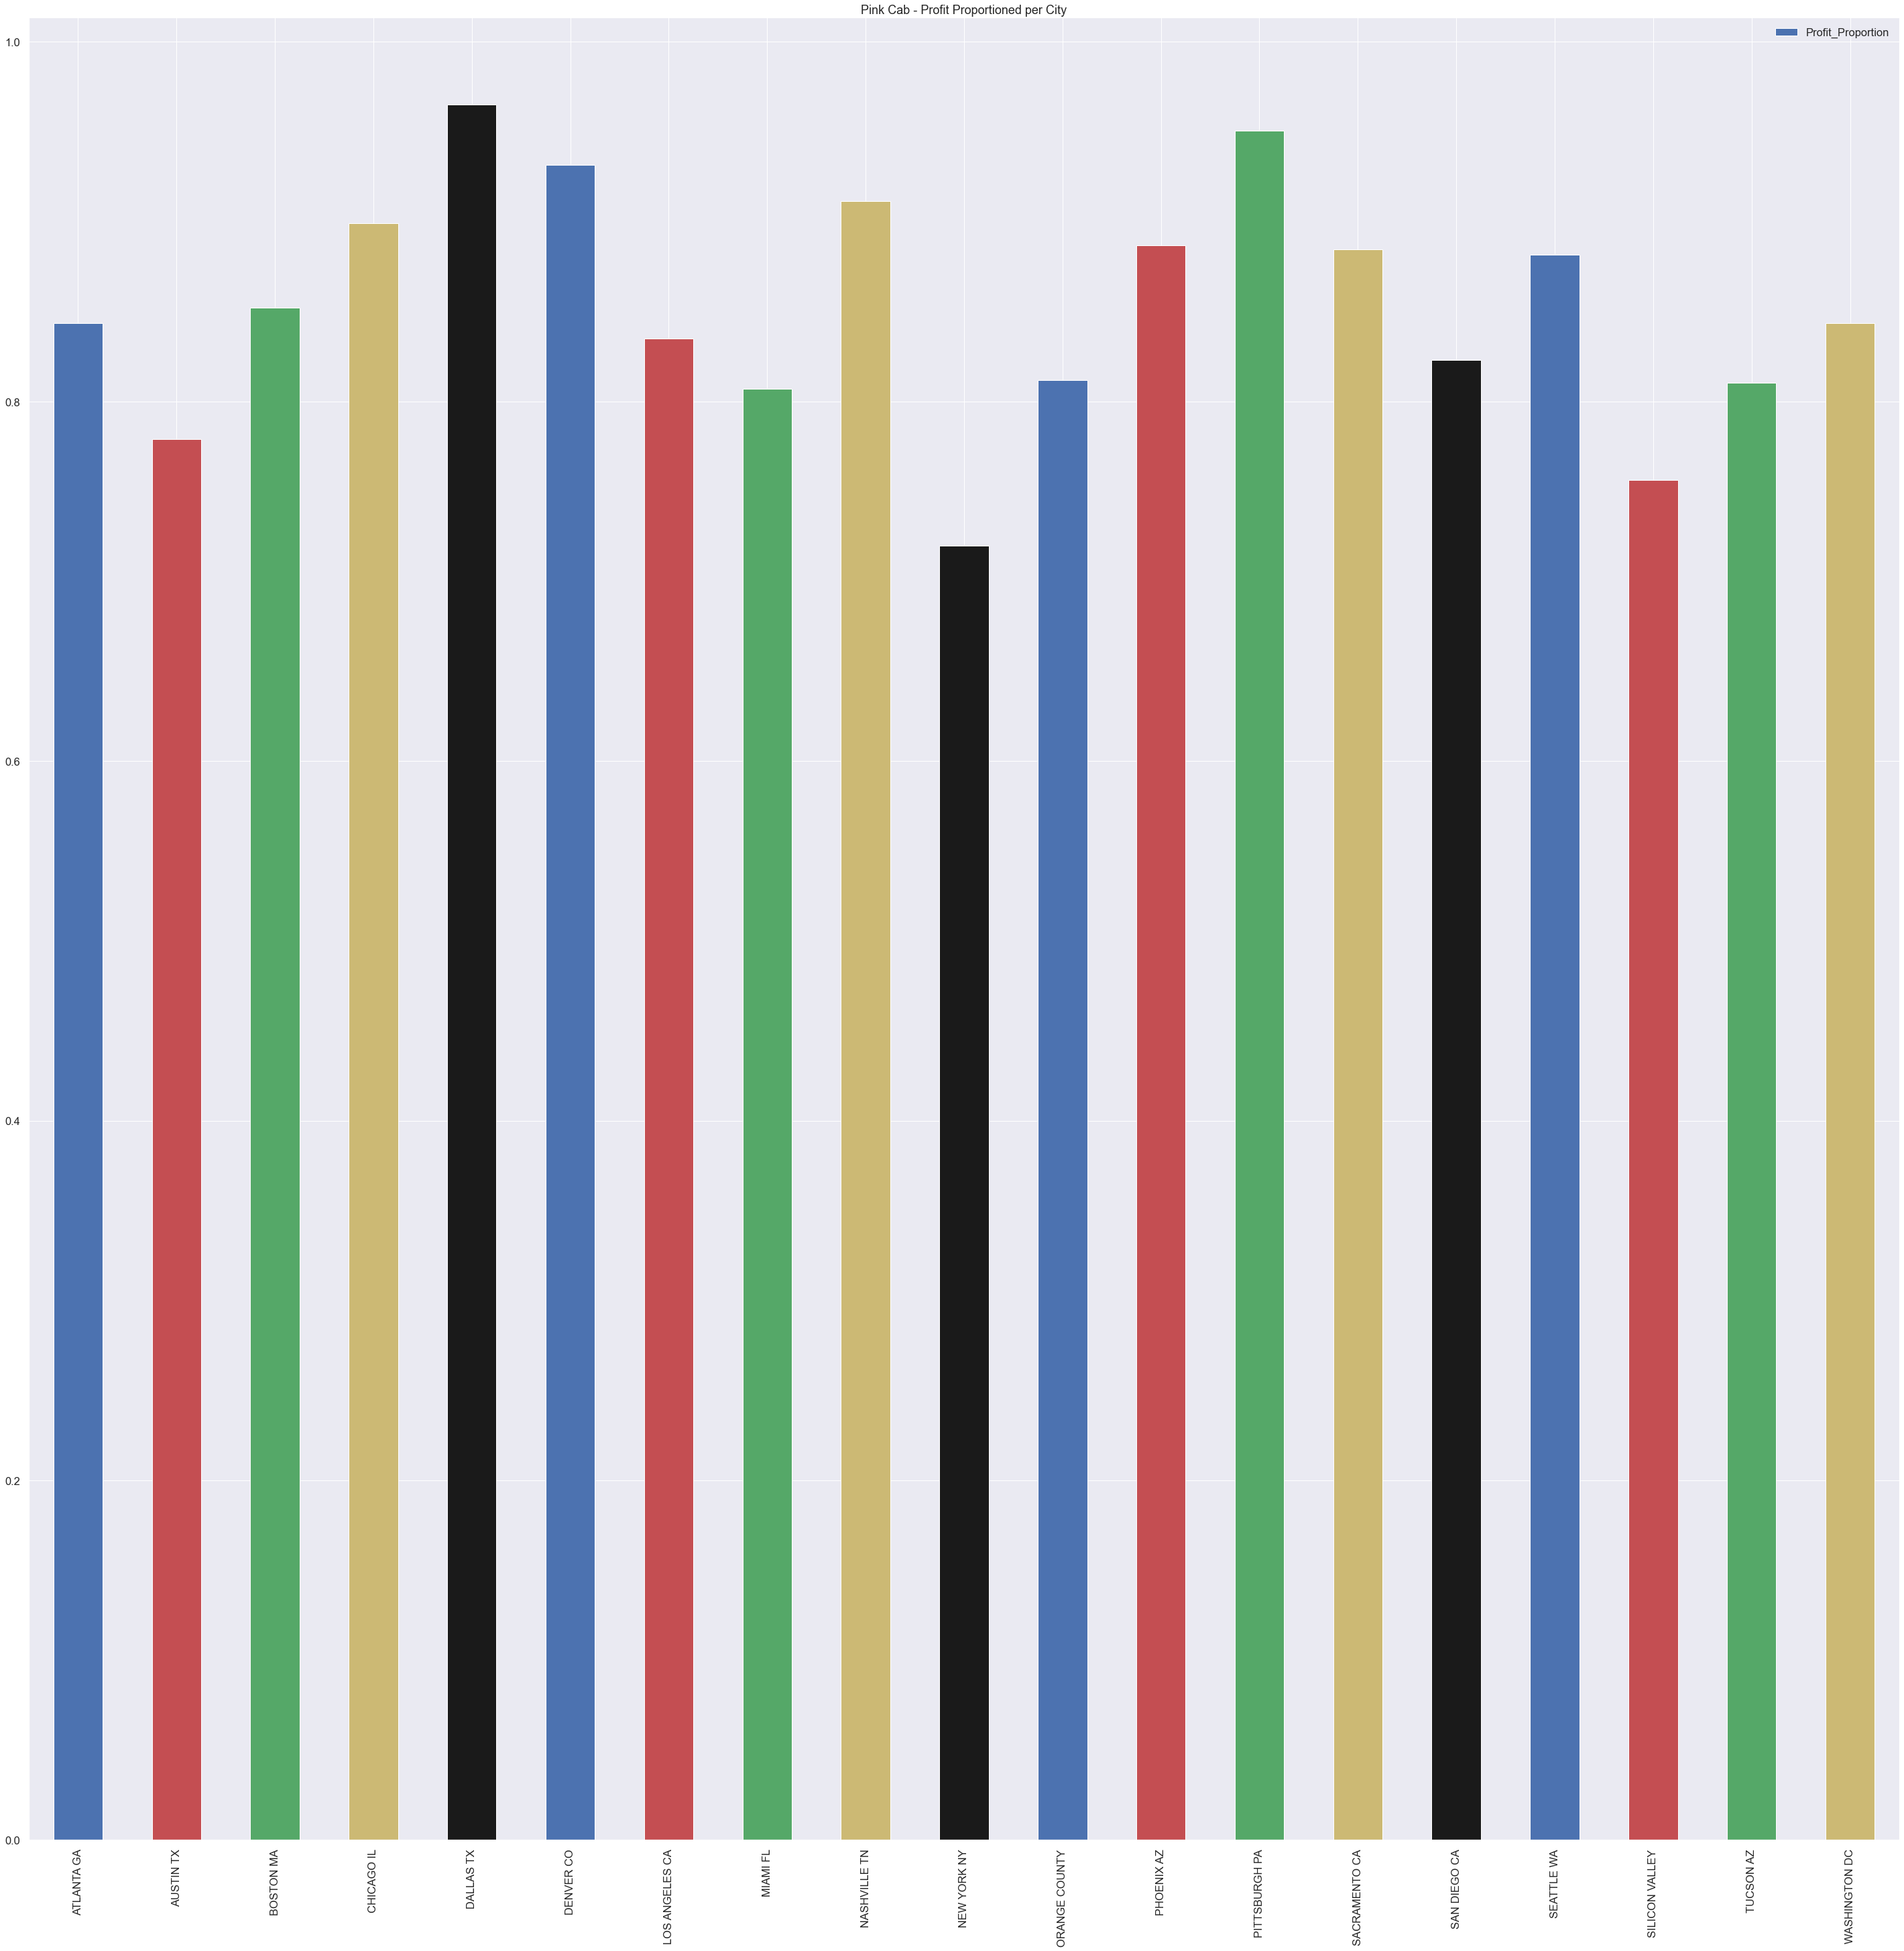

In [32]:
pcab.groupby(['City']).Profit_Proportion.mean().plot(kind = 'bar', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Pink Cab - Profit Proportioned per City")

### 5. Profits over Time

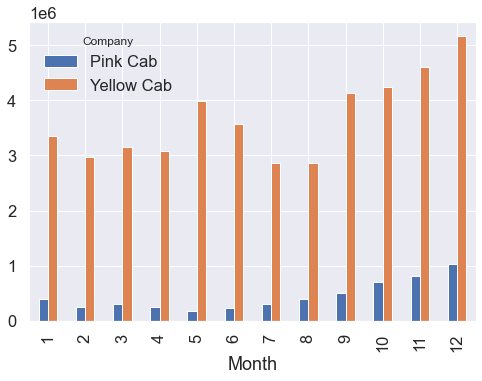

In [33]:
counts = df.groupby(['Month','Company']).Profit.sum().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()


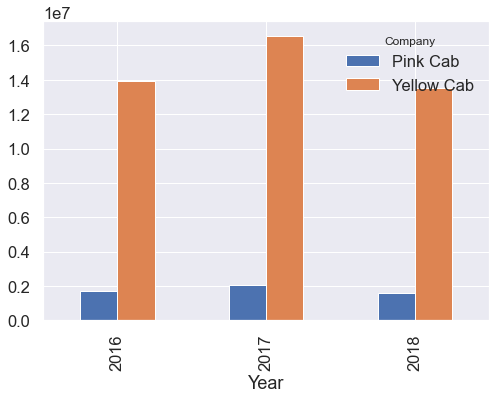

In [34]:
counts = df.groupby(['Year','Company']).Profit.sum().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()


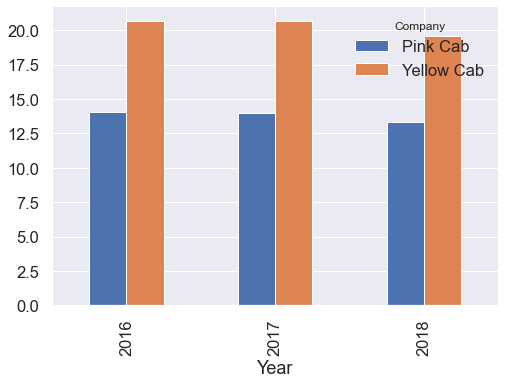

In [35]:
counts = df.groupby(['Year','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()

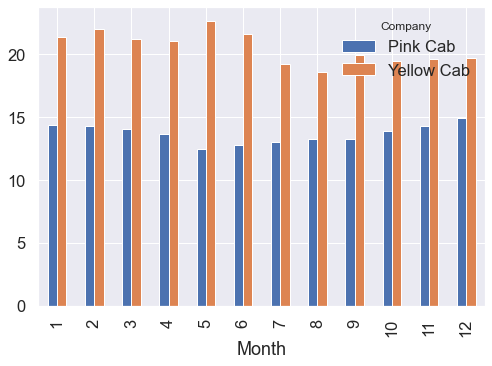

In [36]:
counts = df.groupby(['Month','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()

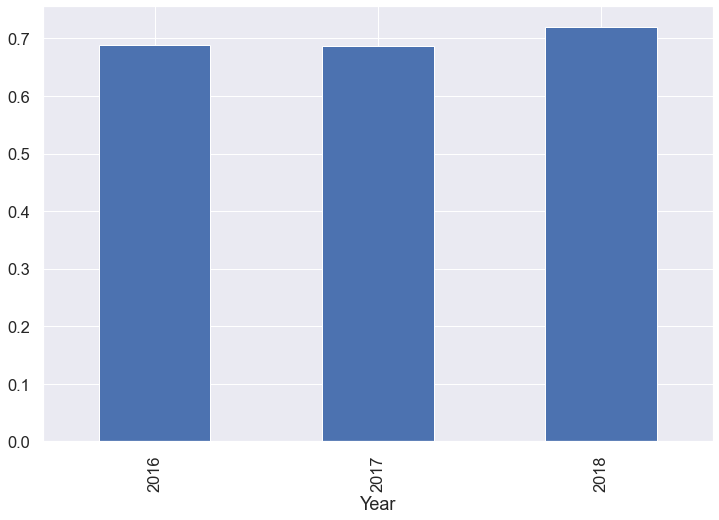

In [37]:
ycab.groupby(['Year']).Profit_Proportion.mean().plot(kind = 'bar', figsize=(12,8))

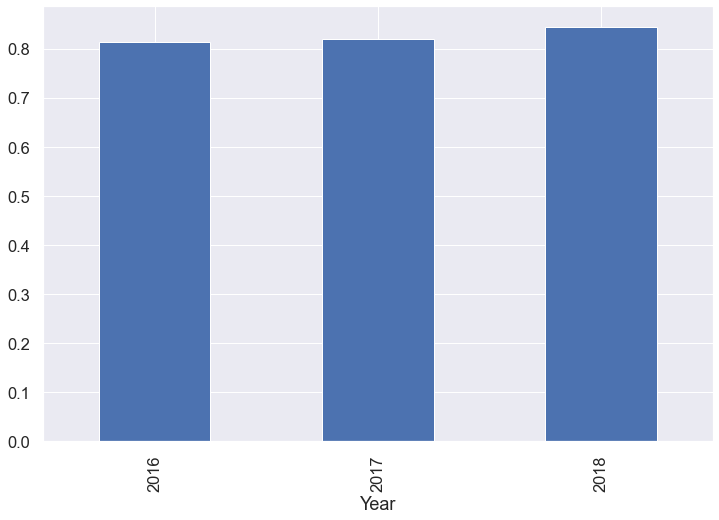

In [38]:
pcab.groupby(['Year']).Profit_Proportion.mean().plot(kind = 'bar', figsize=(12,8))

Year
2016    20.691080
2017    20.697927
2018    19.561922
Name: Profit_per_KM, dtype: float64


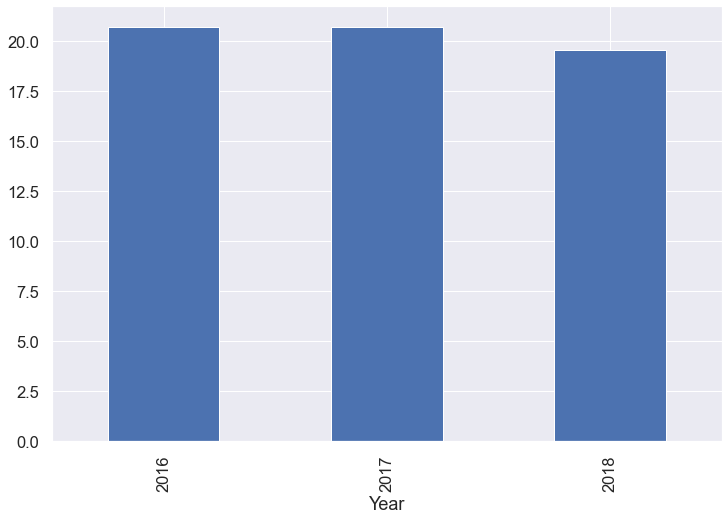

In [39]:
ycab.groupby(['Year']).Profit_per_KM.mean().plot(kind = 'bar', figsize=(12,8))
print(ycab.groupby(['Year']).Profit_per_KM.mean())

Year
2016    14.019628
2017    13.961471
2018    13.354016
Name: Profit_per_KM, dtype: float64


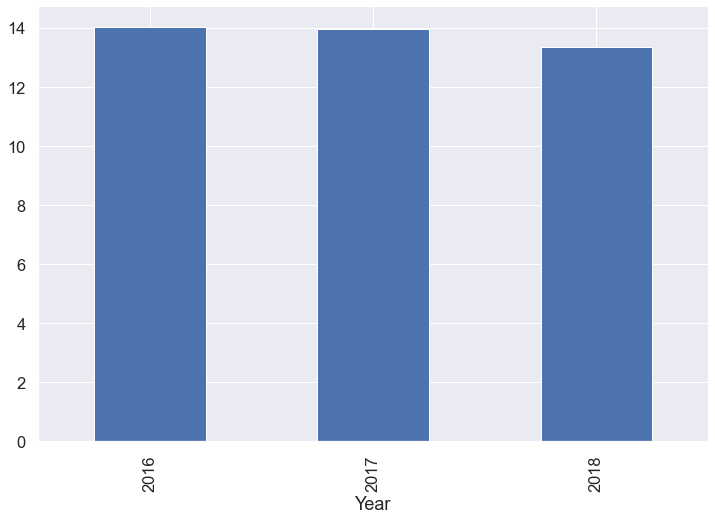

In [40]:
pcab.groupby(['Year']).Profit_per_KM.mean().plot(kind = 'bar', figsize=(12,8))
print(pcab.groupby(['Year']).Profit_per_KM.mean())

## Profit Analysis Conclusion:




# Customer Analysis

Now that we have taken a look at the profits in comparison between Pink and Yellow, we should ask who their target demographic is. Just who are their customers and how are they reaching them?

Some questions:

1. What proportion of Users are Male to Female? Male to Female proportions for each company?
2. Is there a large income disparity between users of Pink and Yellow?
3. What is the income disparity for each city?
4. Proportion of Trips per City
5. What is the disparity of payments? Payments between companies?
6. The age distribution among customers? Among each company?
7. Do credit cards or cash tend to have more per trip?

### 1. Customer Proportion by Gender

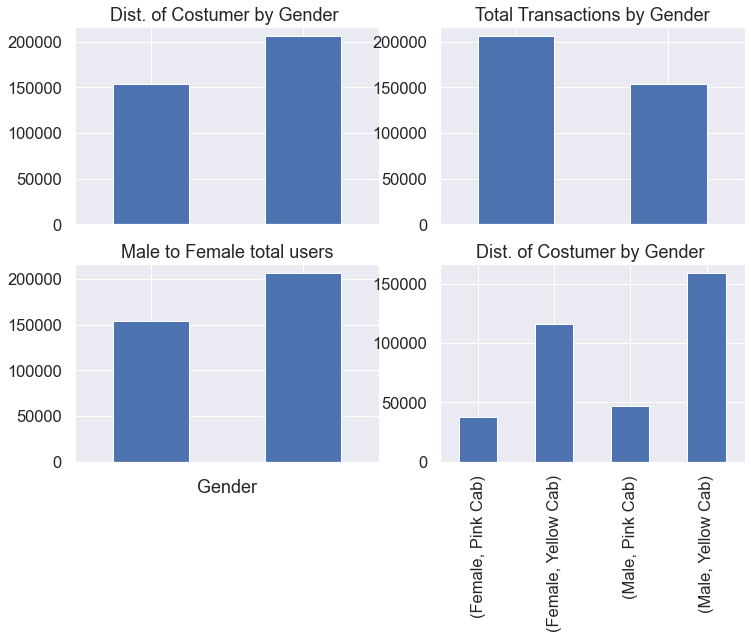

In [41]:
plt.figure(figsize = (10,10))
# Male
plt.subplot(2,2,1)
df.groupby(['Gender']).Customer_ID.count().plot(kind = 'bar', figsize=(12,8))
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.xlabel("")
plt.title("Dist. of Costumer by Gender ")

#Male to Female total Transactions
plt.subplot(2,2,2)
df["Gender"].value_counts().plot(kind = 'bar', figsize=(12,8))
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.xlabel("")
plt.title("Total Transactions by Gender")

#Male to Female total users
plt.subplot(2,2,3)
df.groupby(['Gender']).Users.count().plot(kind = 'bar', figsize=(12,8))
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.title("Male to Female total users")

plt.subplot(2,2,4)
df.groupby(['Gender', 'Company']).Customer_ID.count().plot(kind = 'bar', figsize=(12,8))
plt.xlabel("")
plt.title("Dist. of Costumer by Gender ")

plt.show();

### 2. Is there a large income disparity between customers of Yellow and Pink?

Company
Pink Cab      1.063892e+10
Yellow Cab    4.627640e+10
Name: Users, dtype: float64


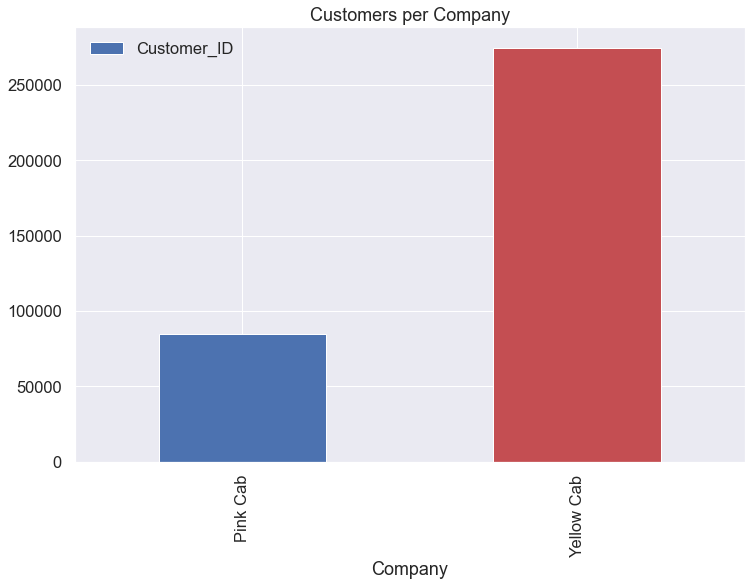

In [42]:
plt.figure(figsize = (20,20))

# Income difference between each Company
df.groupby(['Company']).Customer_ID.count().plot(kind = 'bar', figsize=(12,8), color=my_colors)
plt.legend()
plt.title("Customers per Company")
print(df.groupby(['Company']).Users.sum())

Text(0.5, 1.0, 'Avg Income/Month by Company')

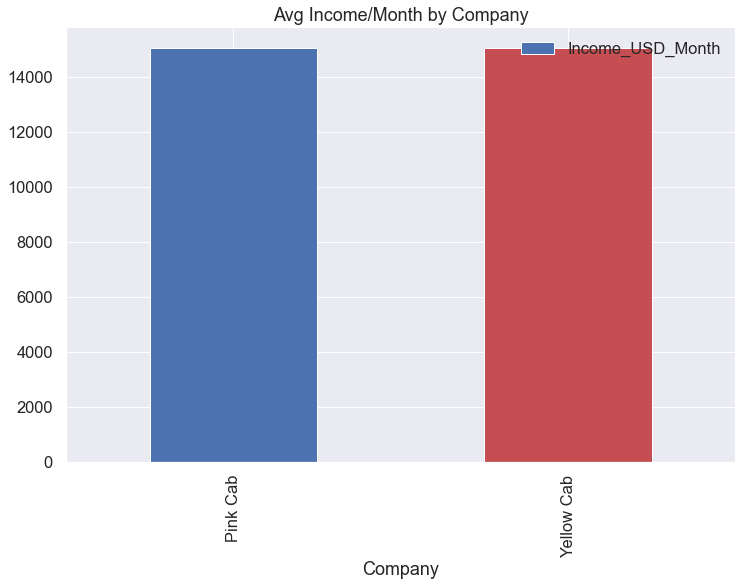

In [43]:
plt.figure(figsize = (20,20))

# Income difference between each Company
df.groupby(['Company']).Income_USD_Month.mean().plot(kind = 'bar', figsize=(12,8), color=my_colors)
plt.legend()
plt.title("Avg Income/Month by Company")

Text(0.5, 1.0, 'Avg Income/Month by Company for Year')

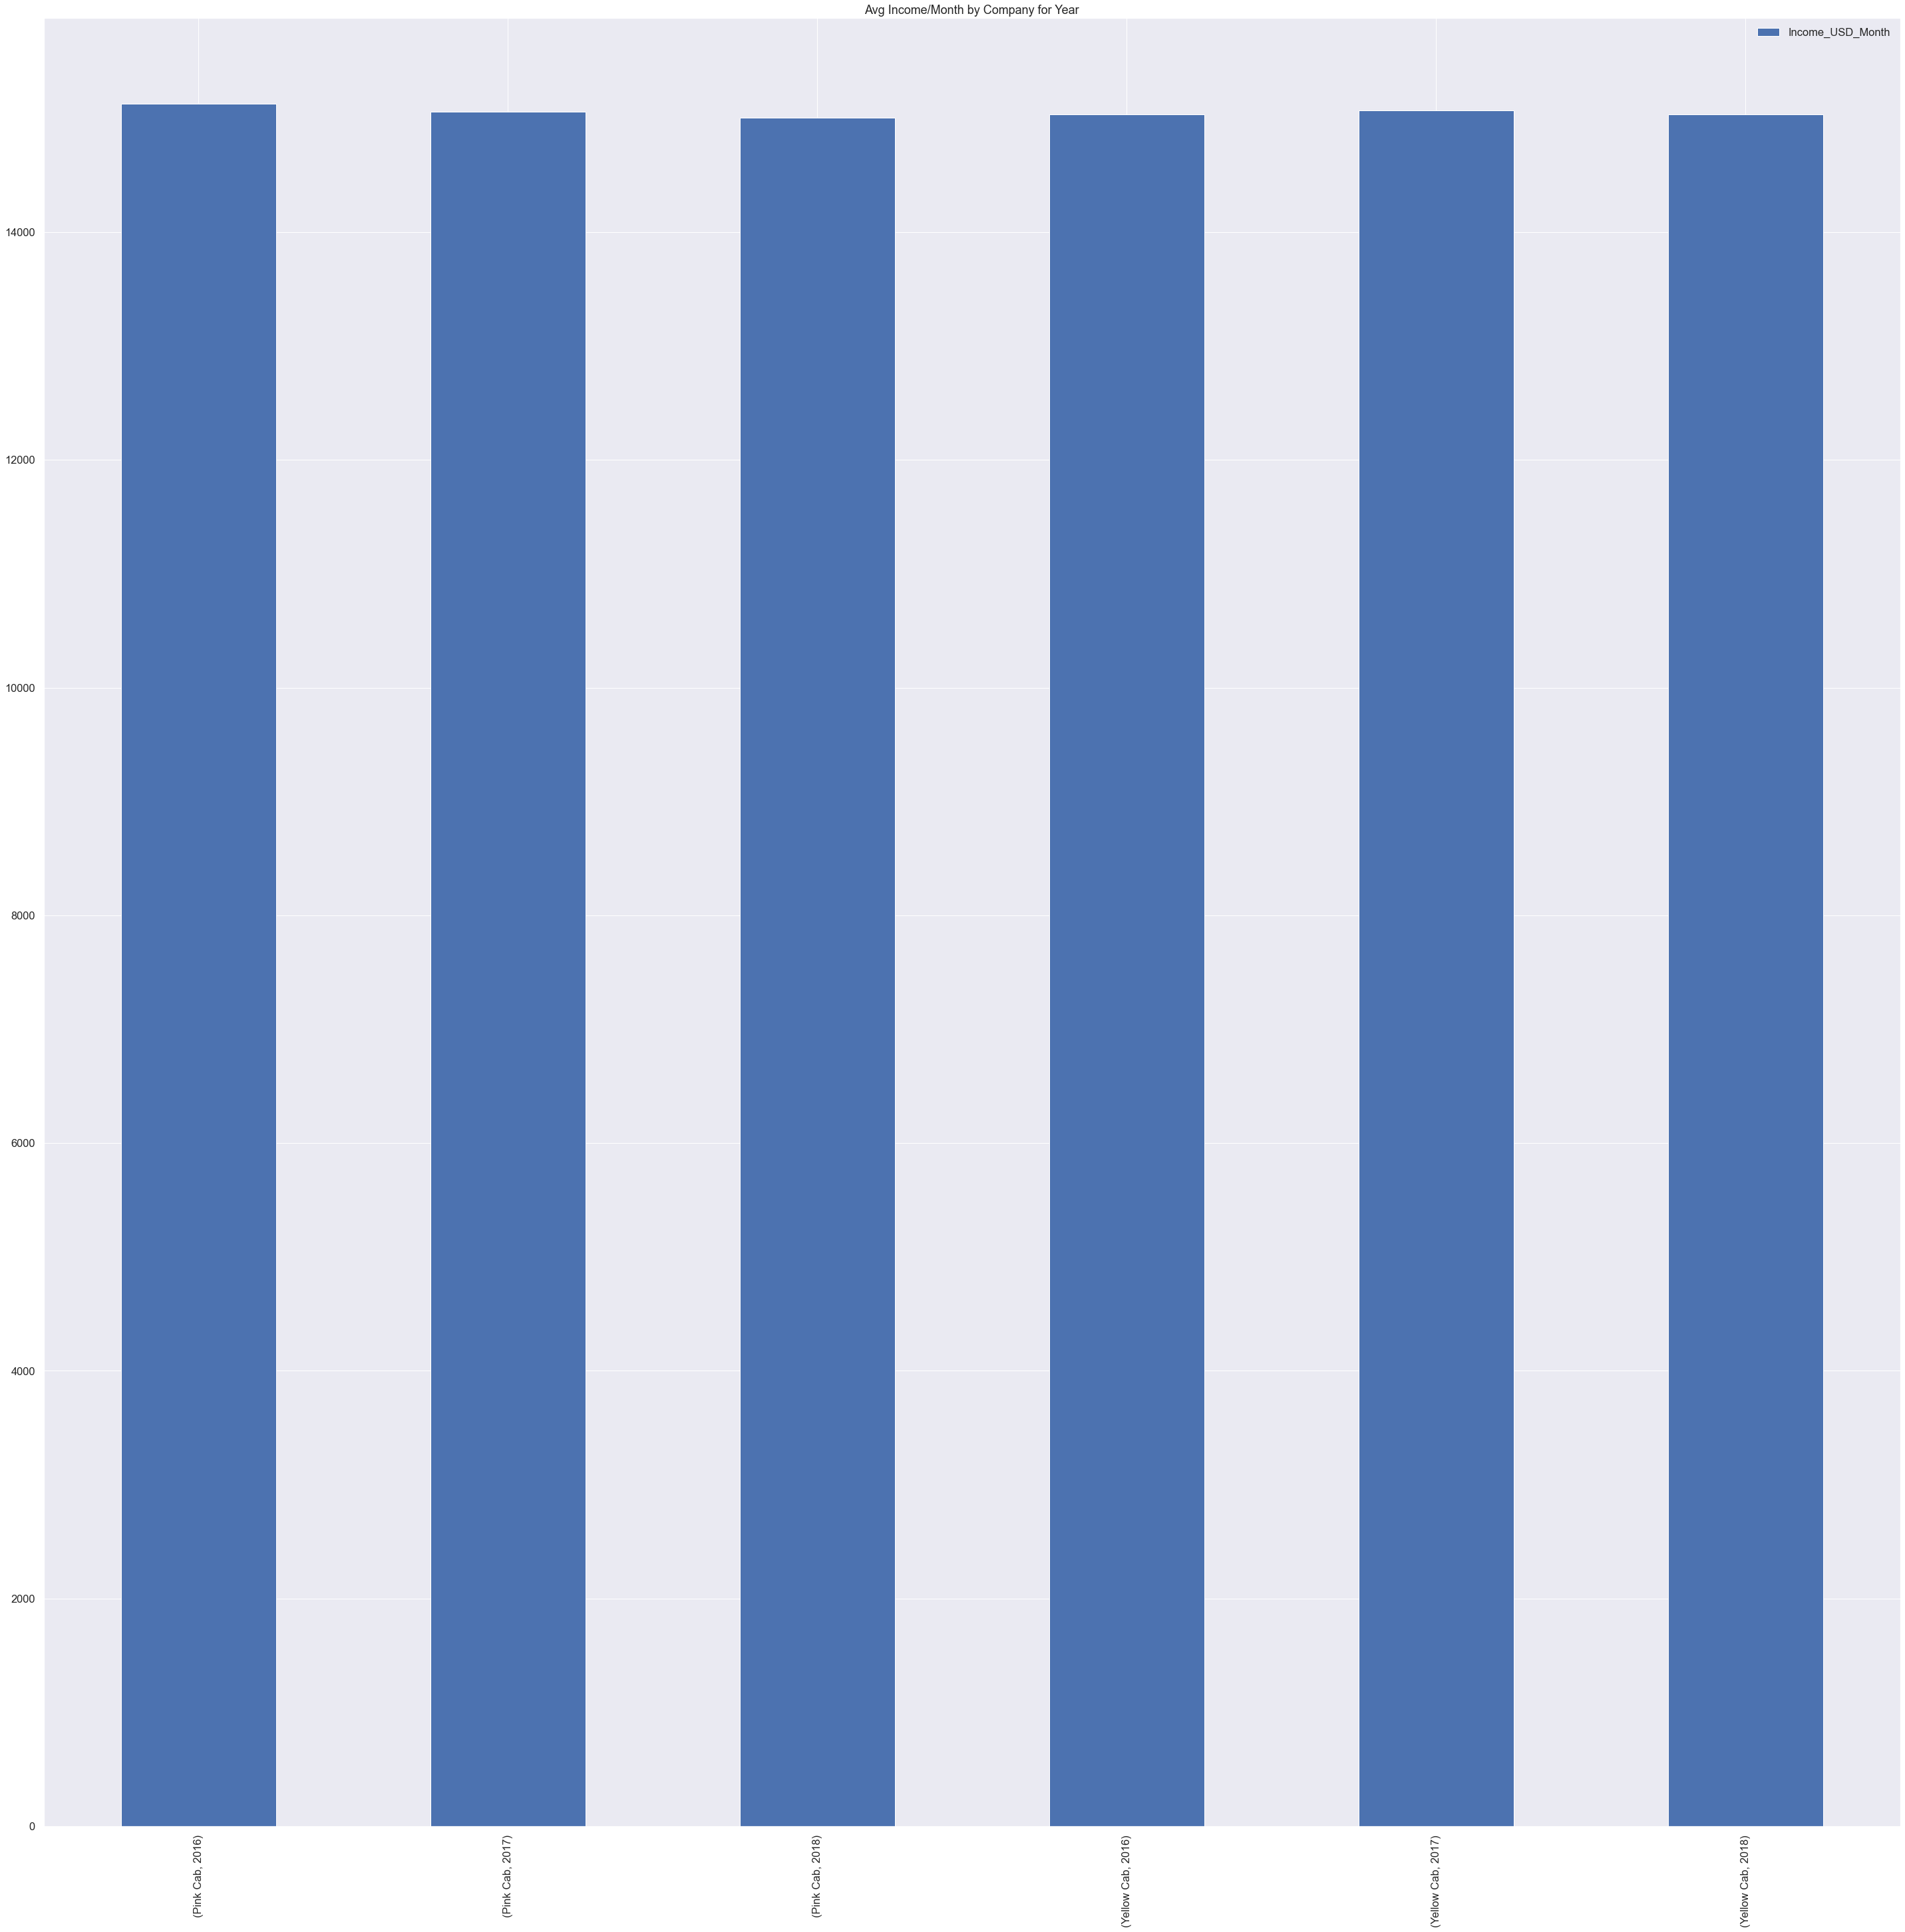

In [44]:
#Income variance by Year and City
df.groupby(['Company', 'Year']).Income_USD_Month.mean().plot(kind = 'bar', figsize=(50,50))
plt.xlabel("")
plt.legend()
plt.title("Avg Income/Month by Company for Year")

Text(0.5, 1.0, 'Avg Income/Month by City')

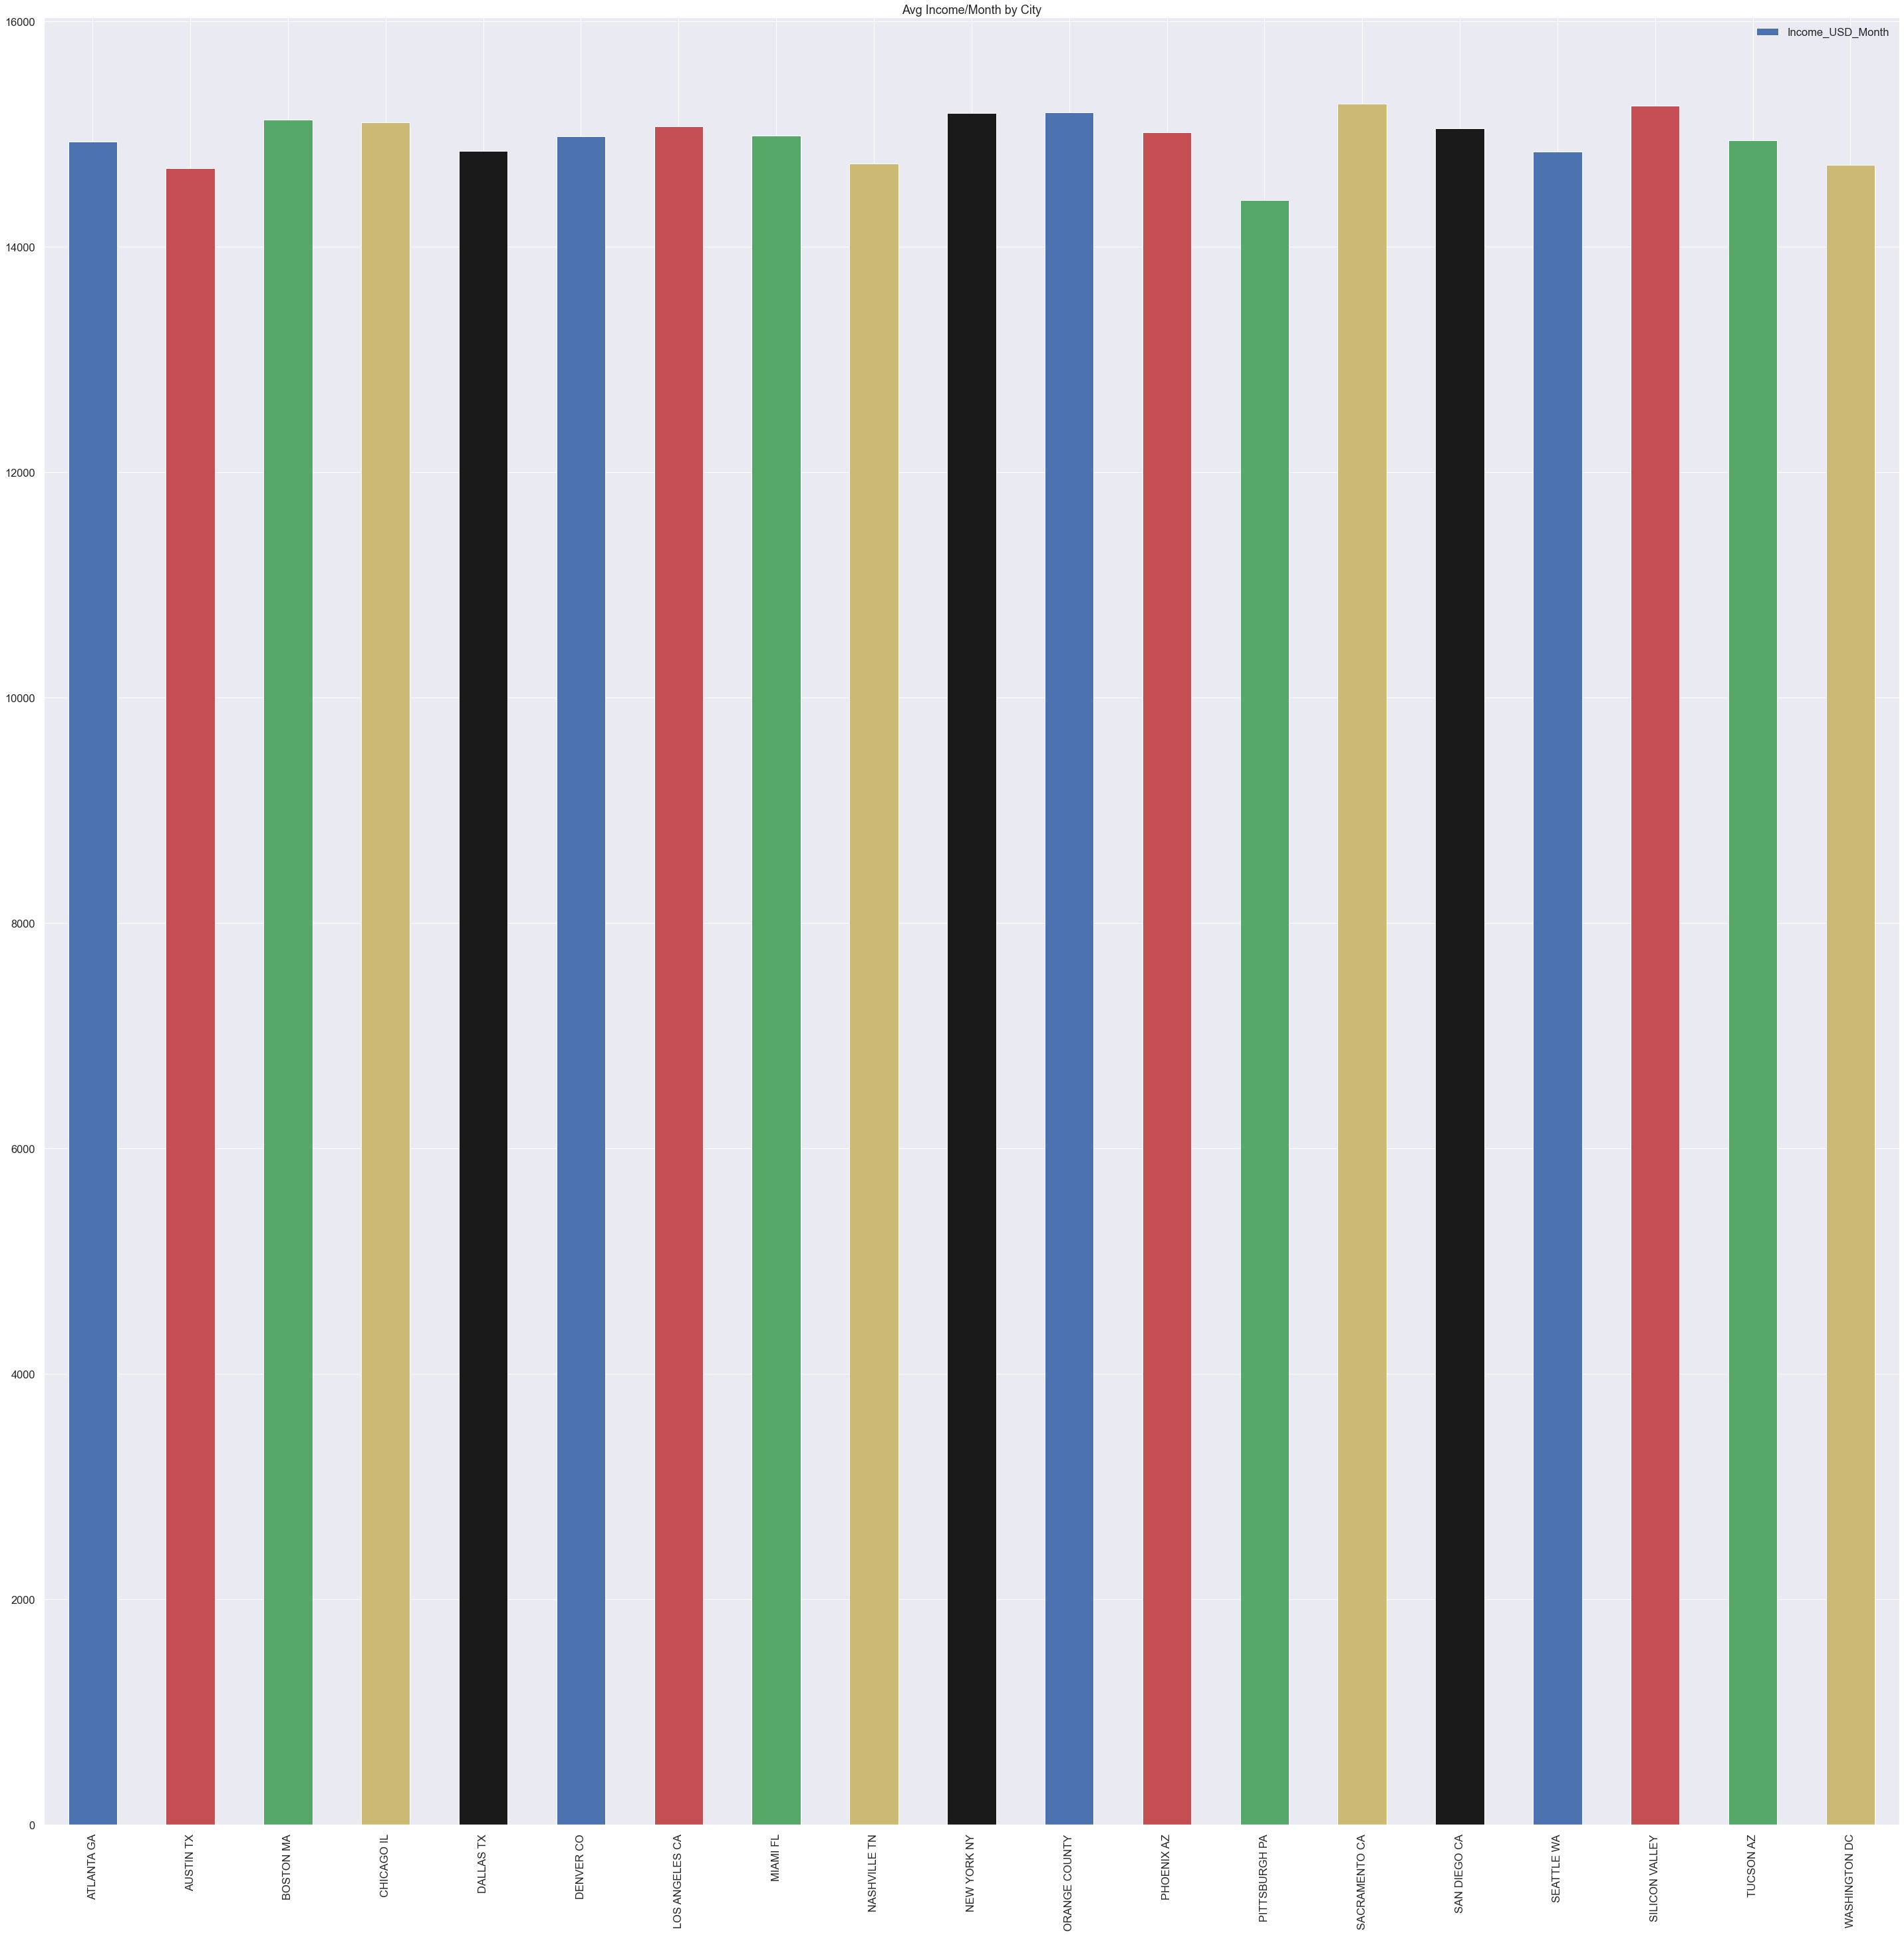

In [45]:
#Income variance by City
df.groupby(['City']).Income_USD_Month.mean().plot(kind = 'bar', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Avg Income/Month by City")

### 3. What is the income disparity for each city?

Text(0.5, 1.0, 'Avg Income/Month by Company, per City')

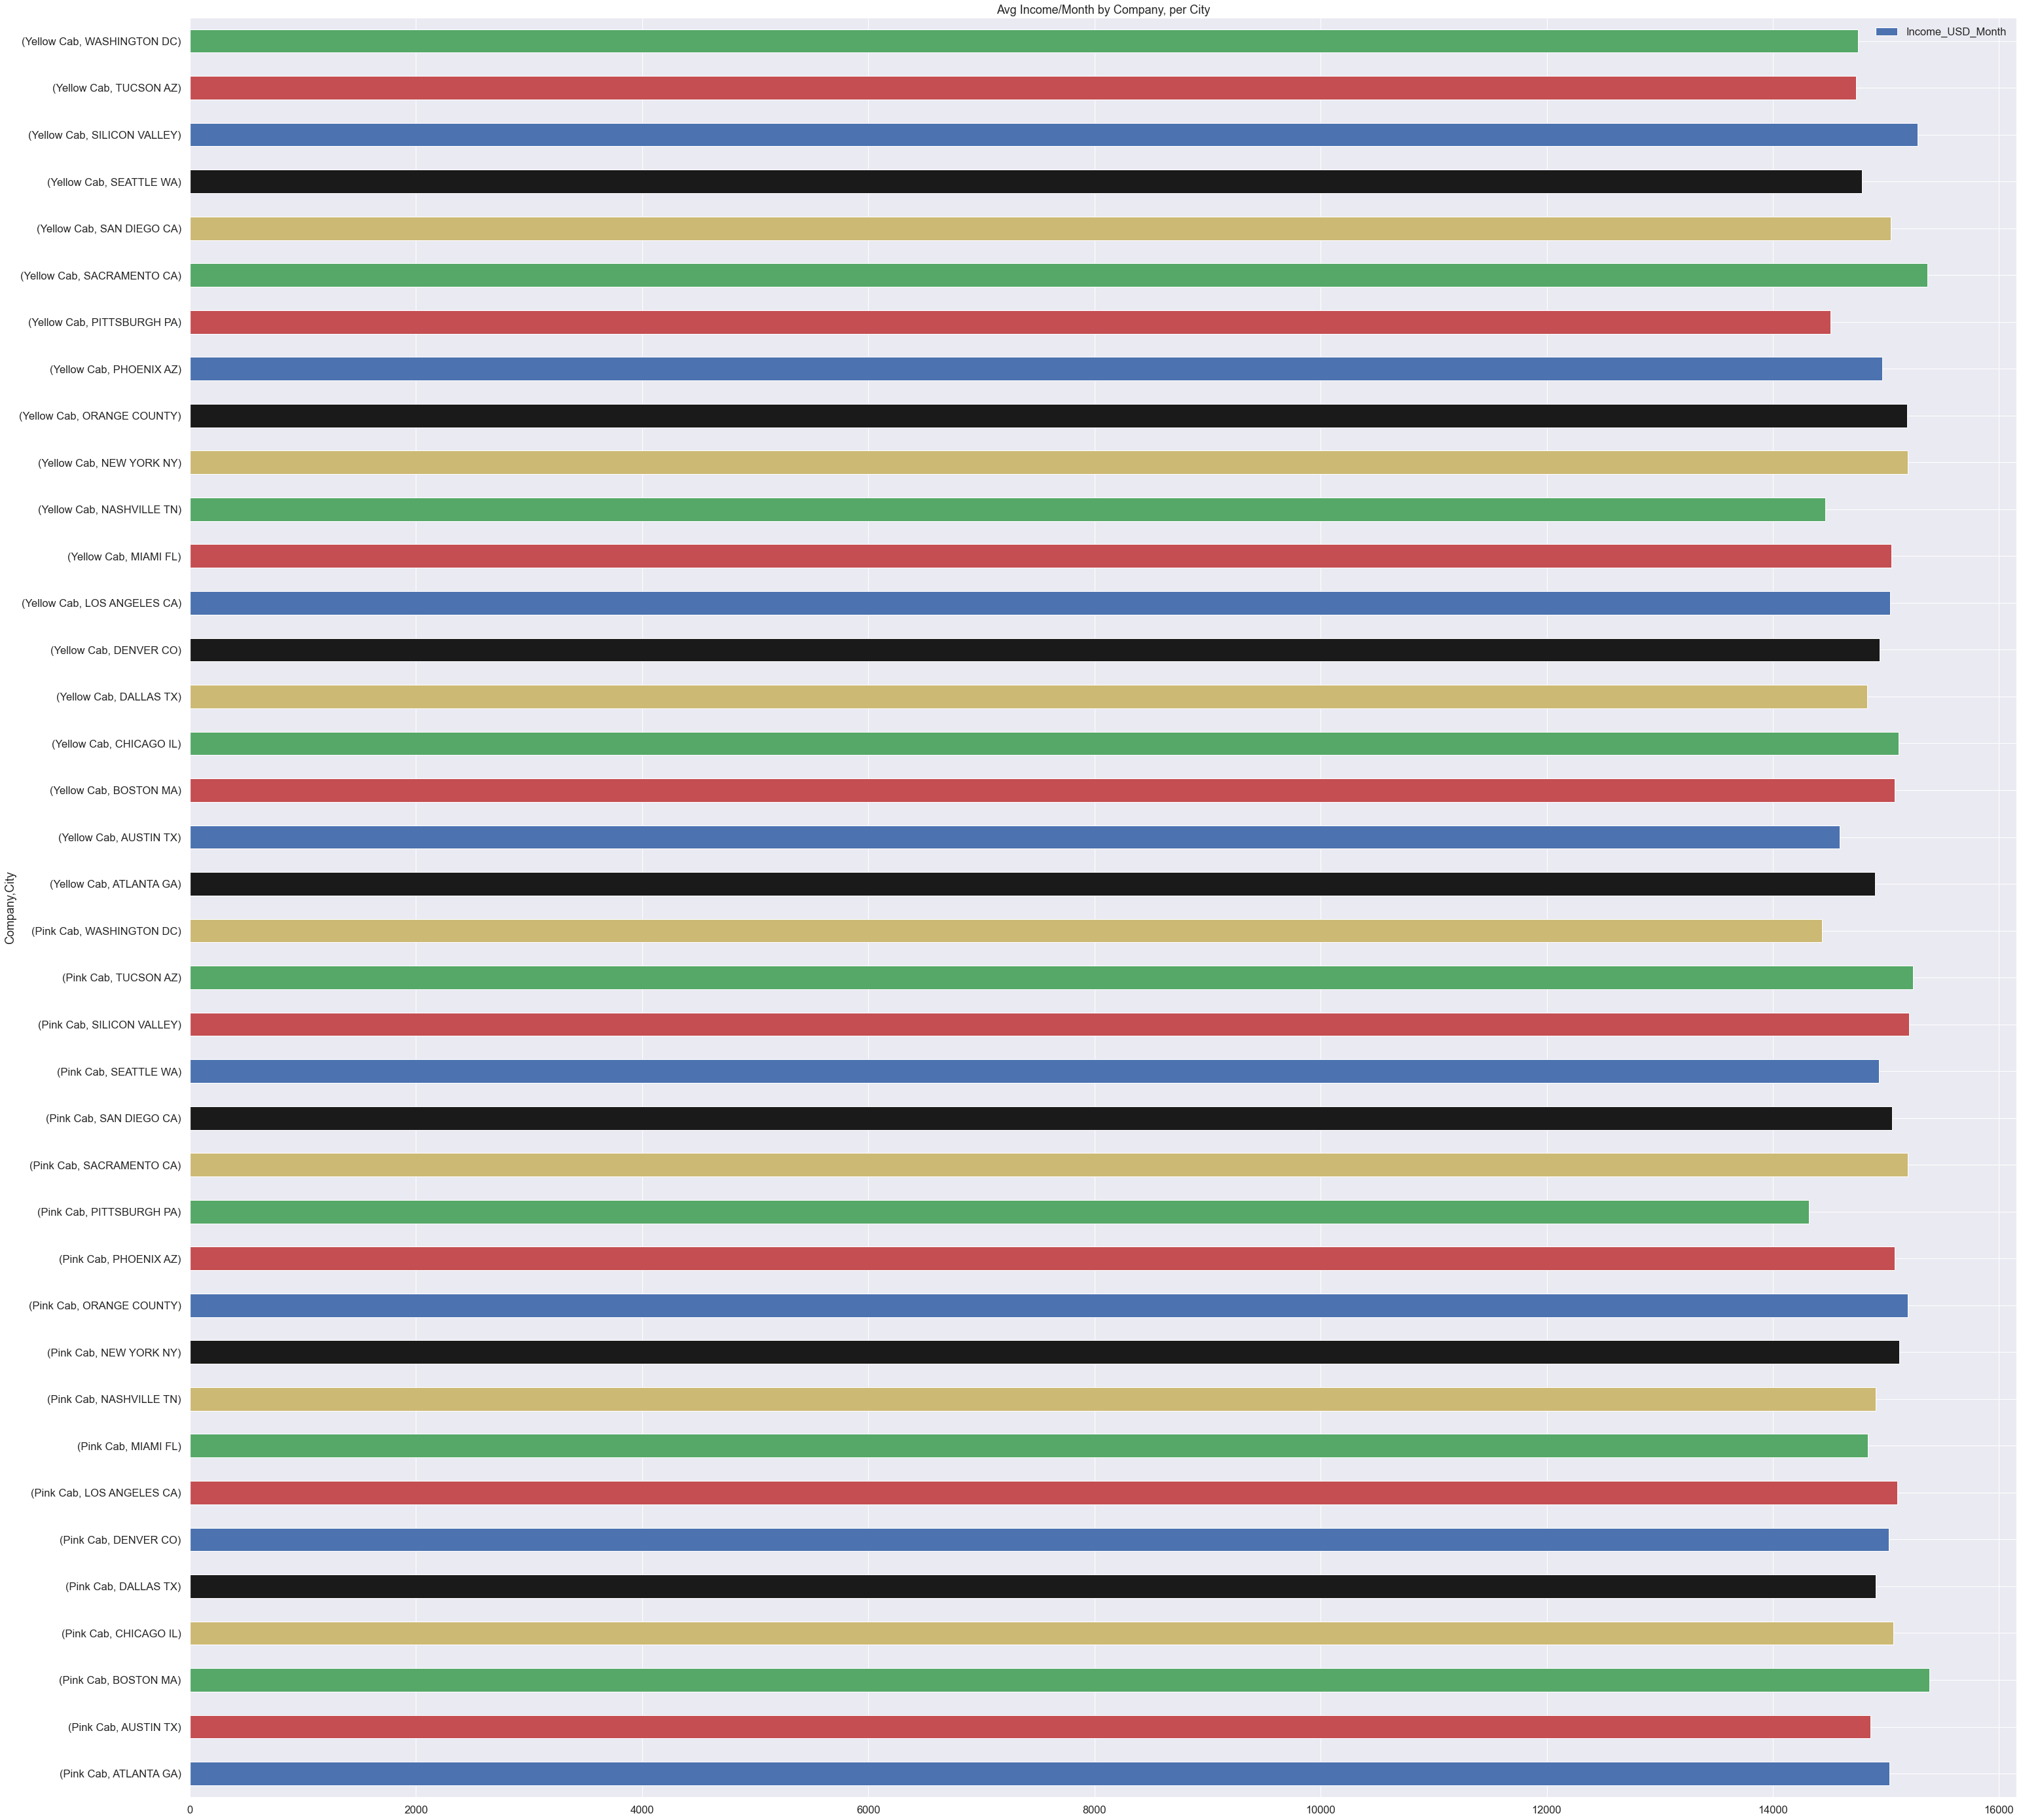

In [46]:
#Income to City, divided by Company
df.groupby(['Company', 'City']).Income_USD_Month.mean().plot(kind = 'barh', figsize=(50,50), color=my_colors)
plt.xlabel("")
plt.legend()
plt.title("Avg Income/Month by Company, per City")

Average Income:  15045.669816987705


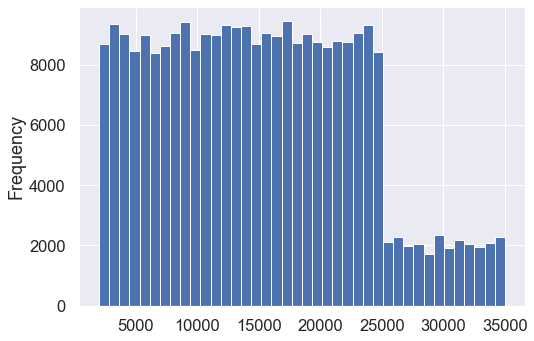

In [47]:
print("Average Income: ", ycab.Income_USD_Month.mean())
ycab.Income_USD_Month.plot(kind='hist', bins=40)

Average Income:  15059.04713673549


Text(0.5, 1.0, '')

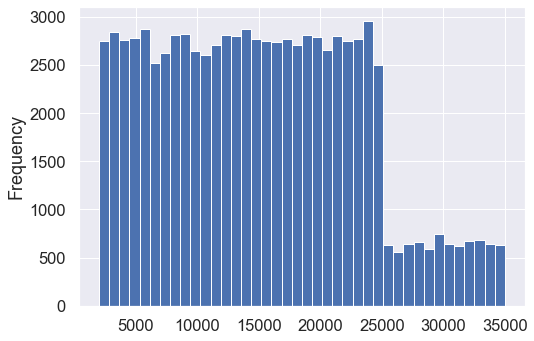

In [48]:
print("Average Income: ", pcab.Income_USD_Month.mean())
pcab.Income_USD_Month.plot(kind='hist', bins=40)
plt.title("")

### 4. Proportion of trips per city?

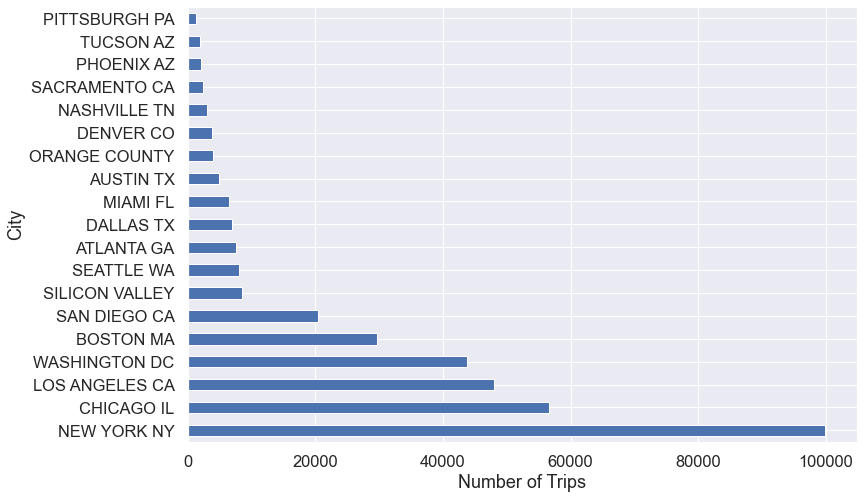

In [49]:
## What is the proportion of number of trips per city?

df["City"].value_counts().plot(kind = 'barh', figsize=(12,8))
plt.xlabel("Number of Trips")
plt.ylabel("City")
plt.show()

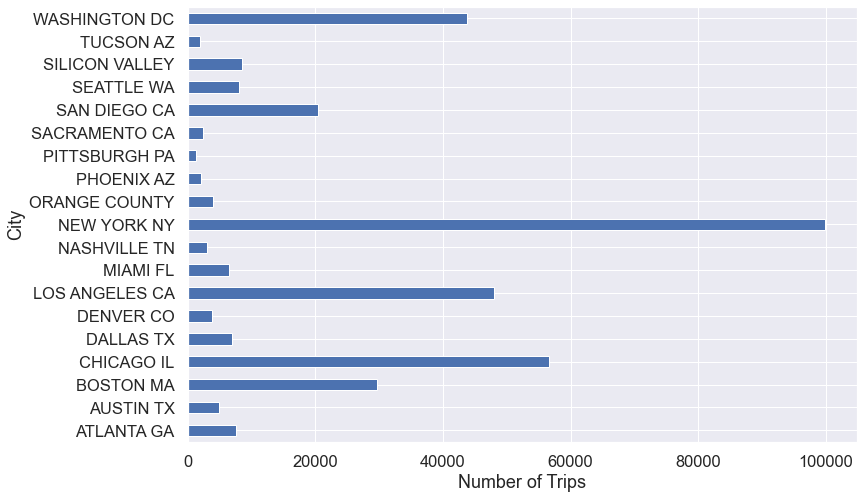

In [50]:
## What is the customer distribution over the cities?

df.groupby(['City']).Customer_ID.count().plot(kind = 'barh', figsize=(12,8))
plt.xlabel("Number of Trips")
plt.ylabel("City")
plt.show()

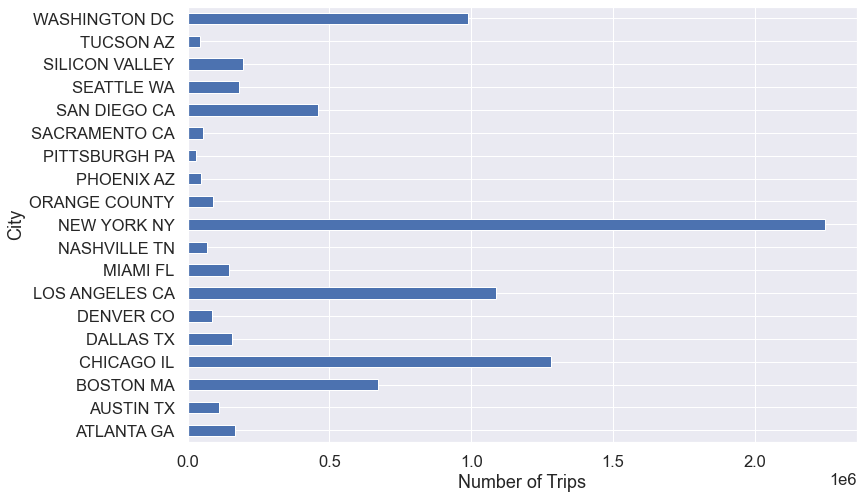

In [51]:
## Length of KM traveled per city?

df.groupby(['City']).KM_Travelled.sum().plot(kind = 'barh', figsize=(12,8))
plt.xlabel("Number of Trips")
plt.ylabel("City")
plt.show()

### 5. What is the disparity of payments? Payments between companies?


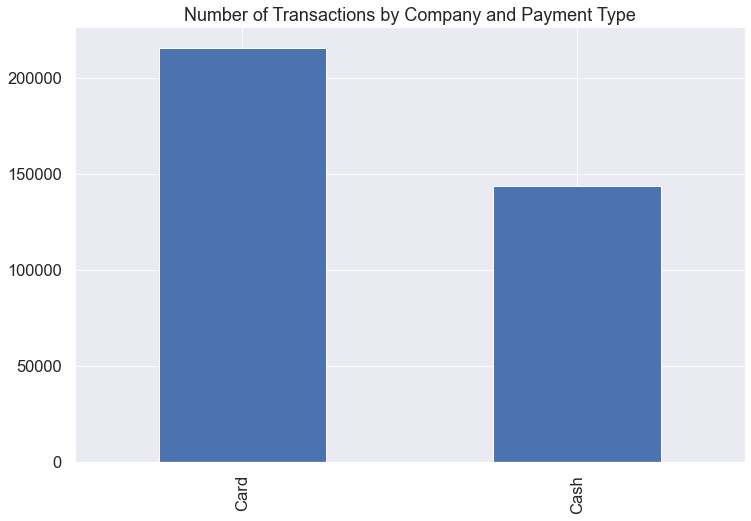

In [52]:
## General disparity
df.groupby(['Payment_Mode']).Transaction_ID.count().plot(kind = 'bar', figsize=(12,8))
plt.xlabel("")
plt.ylabel("")
plt.title("Number of Transactions by Company and Payment Type")
plt.show()

In [53]:
cc = df.groupby(['Payment_Mode']).Transaction_ID.count()
cc.head()

Payment_Mode
Card    215504
Cash    143888
Name: Transaction_ID, dtype: int64

In [54]:
print("Card Payment Proportion: ", (215504/359392) * 100)
print("Cash Payment Proportion: ", (143888/359392) * 100)

Card Payment Proportion:  59.96349390081026
Cash Payment Proportion:  40.036506099189744


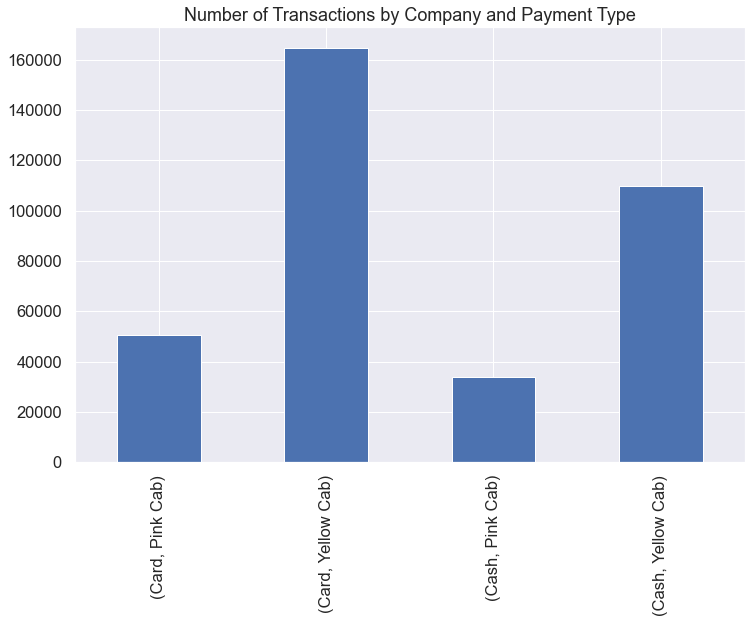

In [55]:
## Disparity of payments between the companies?
df.groupby(['Payment_Mode', 'Company']).Transaction_ID.count().plot(kind = 'bar', figsize=(12,8))
plt.xlabel("")
plt.ylabel("")
plt.title("Number of Transactions by Company and Payment Type")
plt.show()

In [56]:
ccomp = df.groupby(['Payment_Mode', 'Company']).Transaction_ID.count()
ccomp.head()

Payment_Mode  Company   
Card          Pink Cab       50719
              Yellow Cab    164785
Cash          Pink Cab       33992
              Yellow Cab    109896
Name: Transaction_ID, dtype: int64

In [57]:
print("Pink Cab Card Payment Proportion: ", (33992/84711) * 100)
print("Pink Cab Cash Payment Proportion: ", (50719/84711) * 100)
print("Yellow Cab Card Payment Proportion: ", (164785/274681) * 100)
print("Yellow Cab Cash Payment Proportion: ", (109896/274681) * 100)

Pink Cab Card Payment Proportion:  40.127020103646515
Pink Cab Cash Payment Proportion:  59.872979896353485
Yellow Cab Card Payment Proportion:  59.99140821534799
Yellow Cab Cash Payment Proportion:  40.00859178465201


### 6. The age distribution among customers


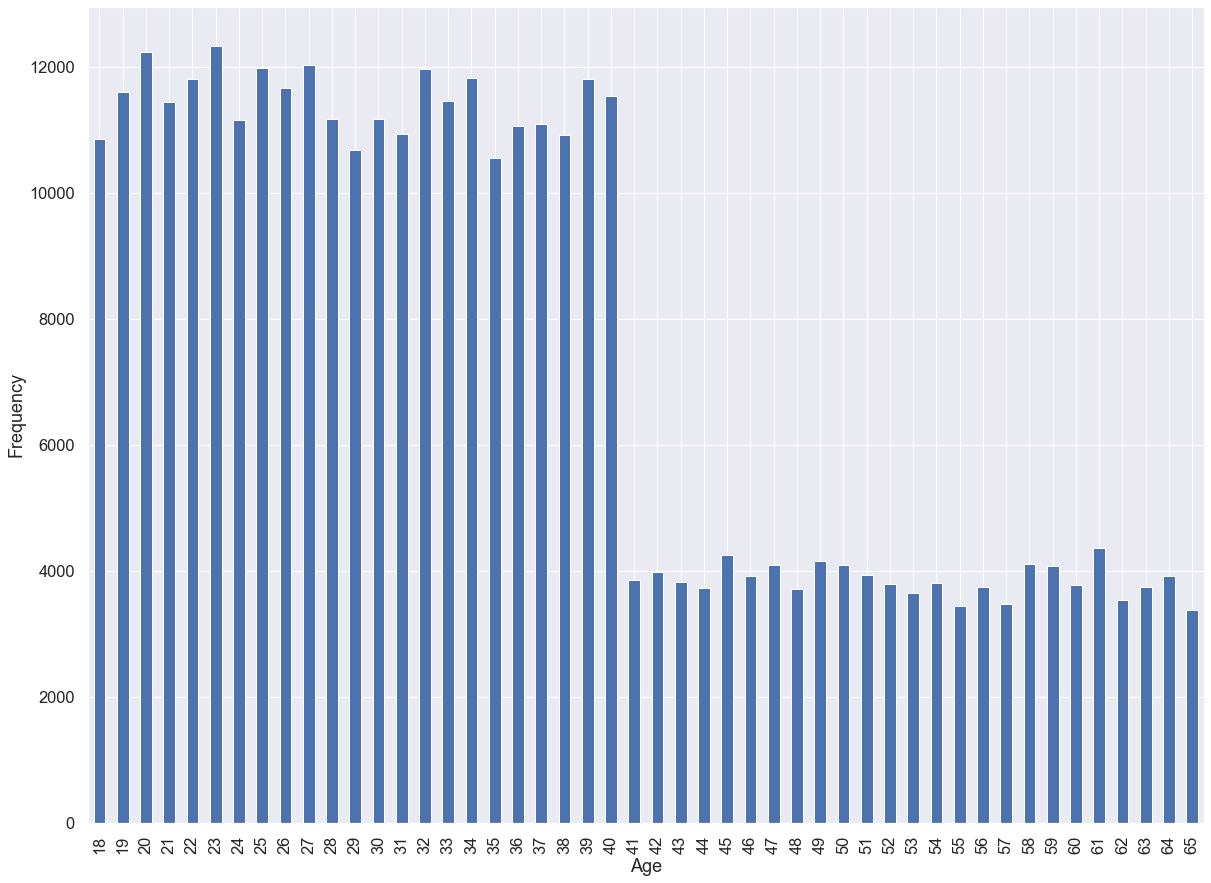

In [58]:
df.groupby(['Age']).Customer_ID.count().plot(kind = 'bar', figsize=(20,15))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

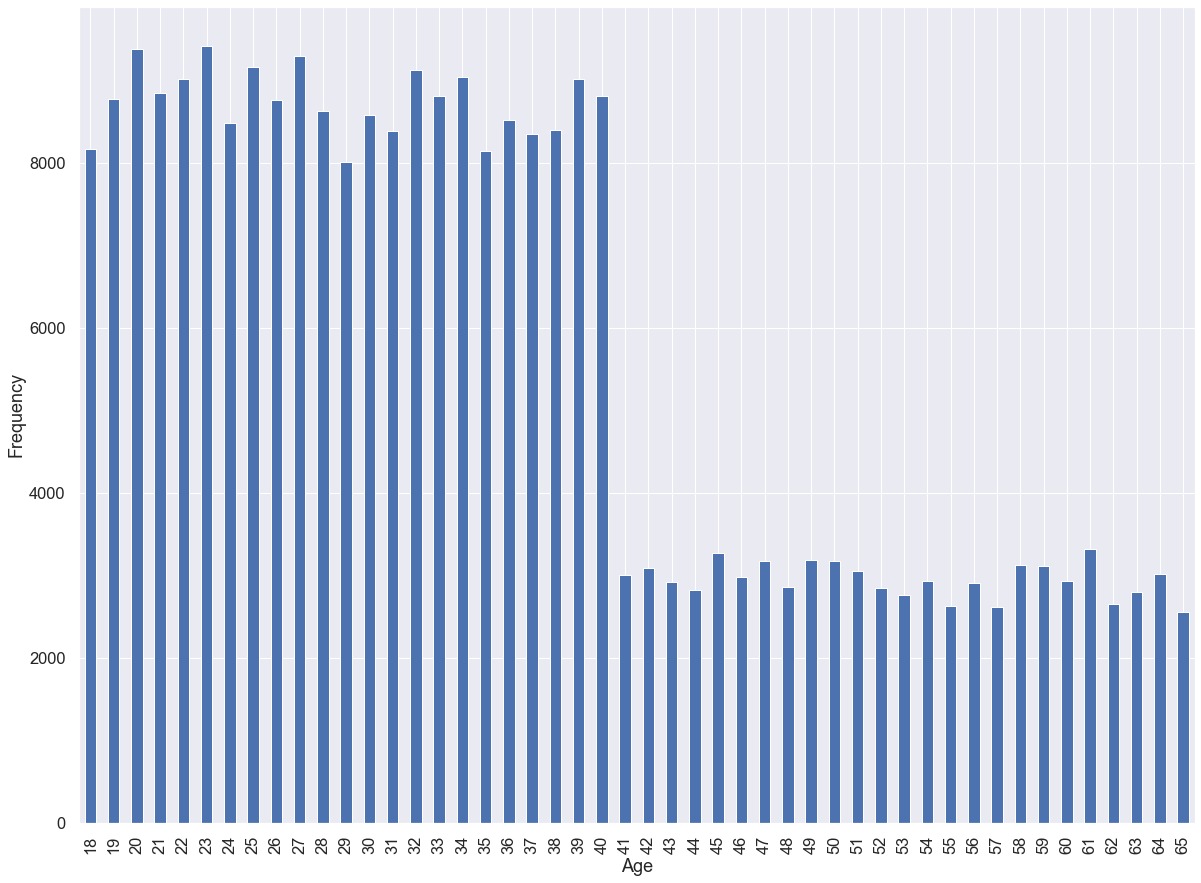

In [59]:
ycab.groupby(['Age']).Customer_ID.count().plot(kind = 'bar', figsize=(20,15))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

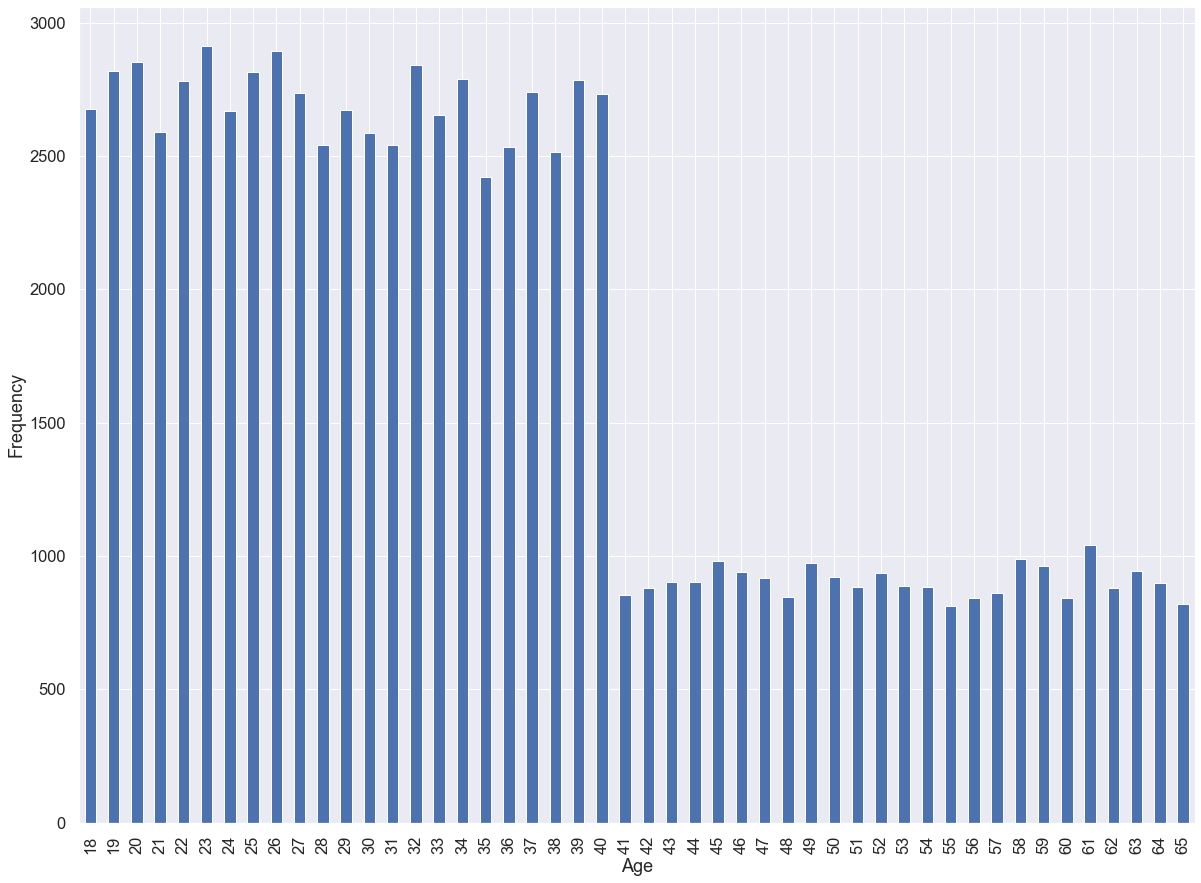

In [60]:
pcab.groupby(['Age']).Customer_ID.count().plot(kind = 'bar', figsize=(20,15))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 0, 'Age')

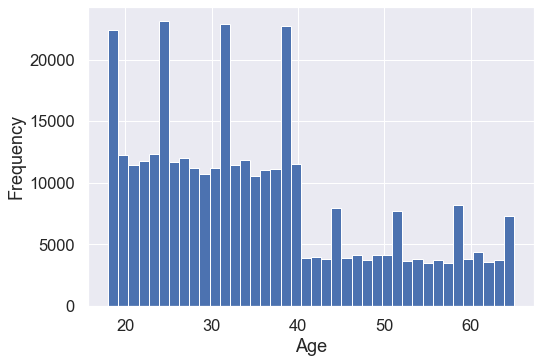

In [61]:
#general age distribution
df.Age.plot(kind='hist', bins = 40)
plt.xlabel('Age')

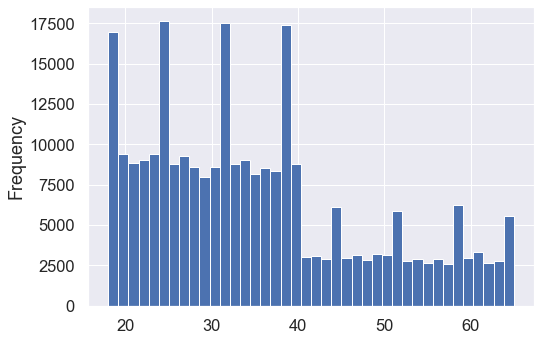

In [62]:
ycab.Age.plot(kind='hist', bins=40)

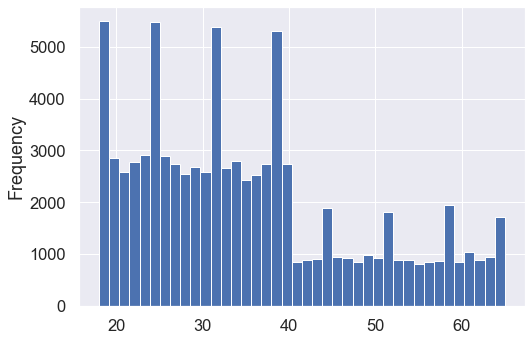

In [63]:
pcab.Age.plot(kind='hist', bins=40)

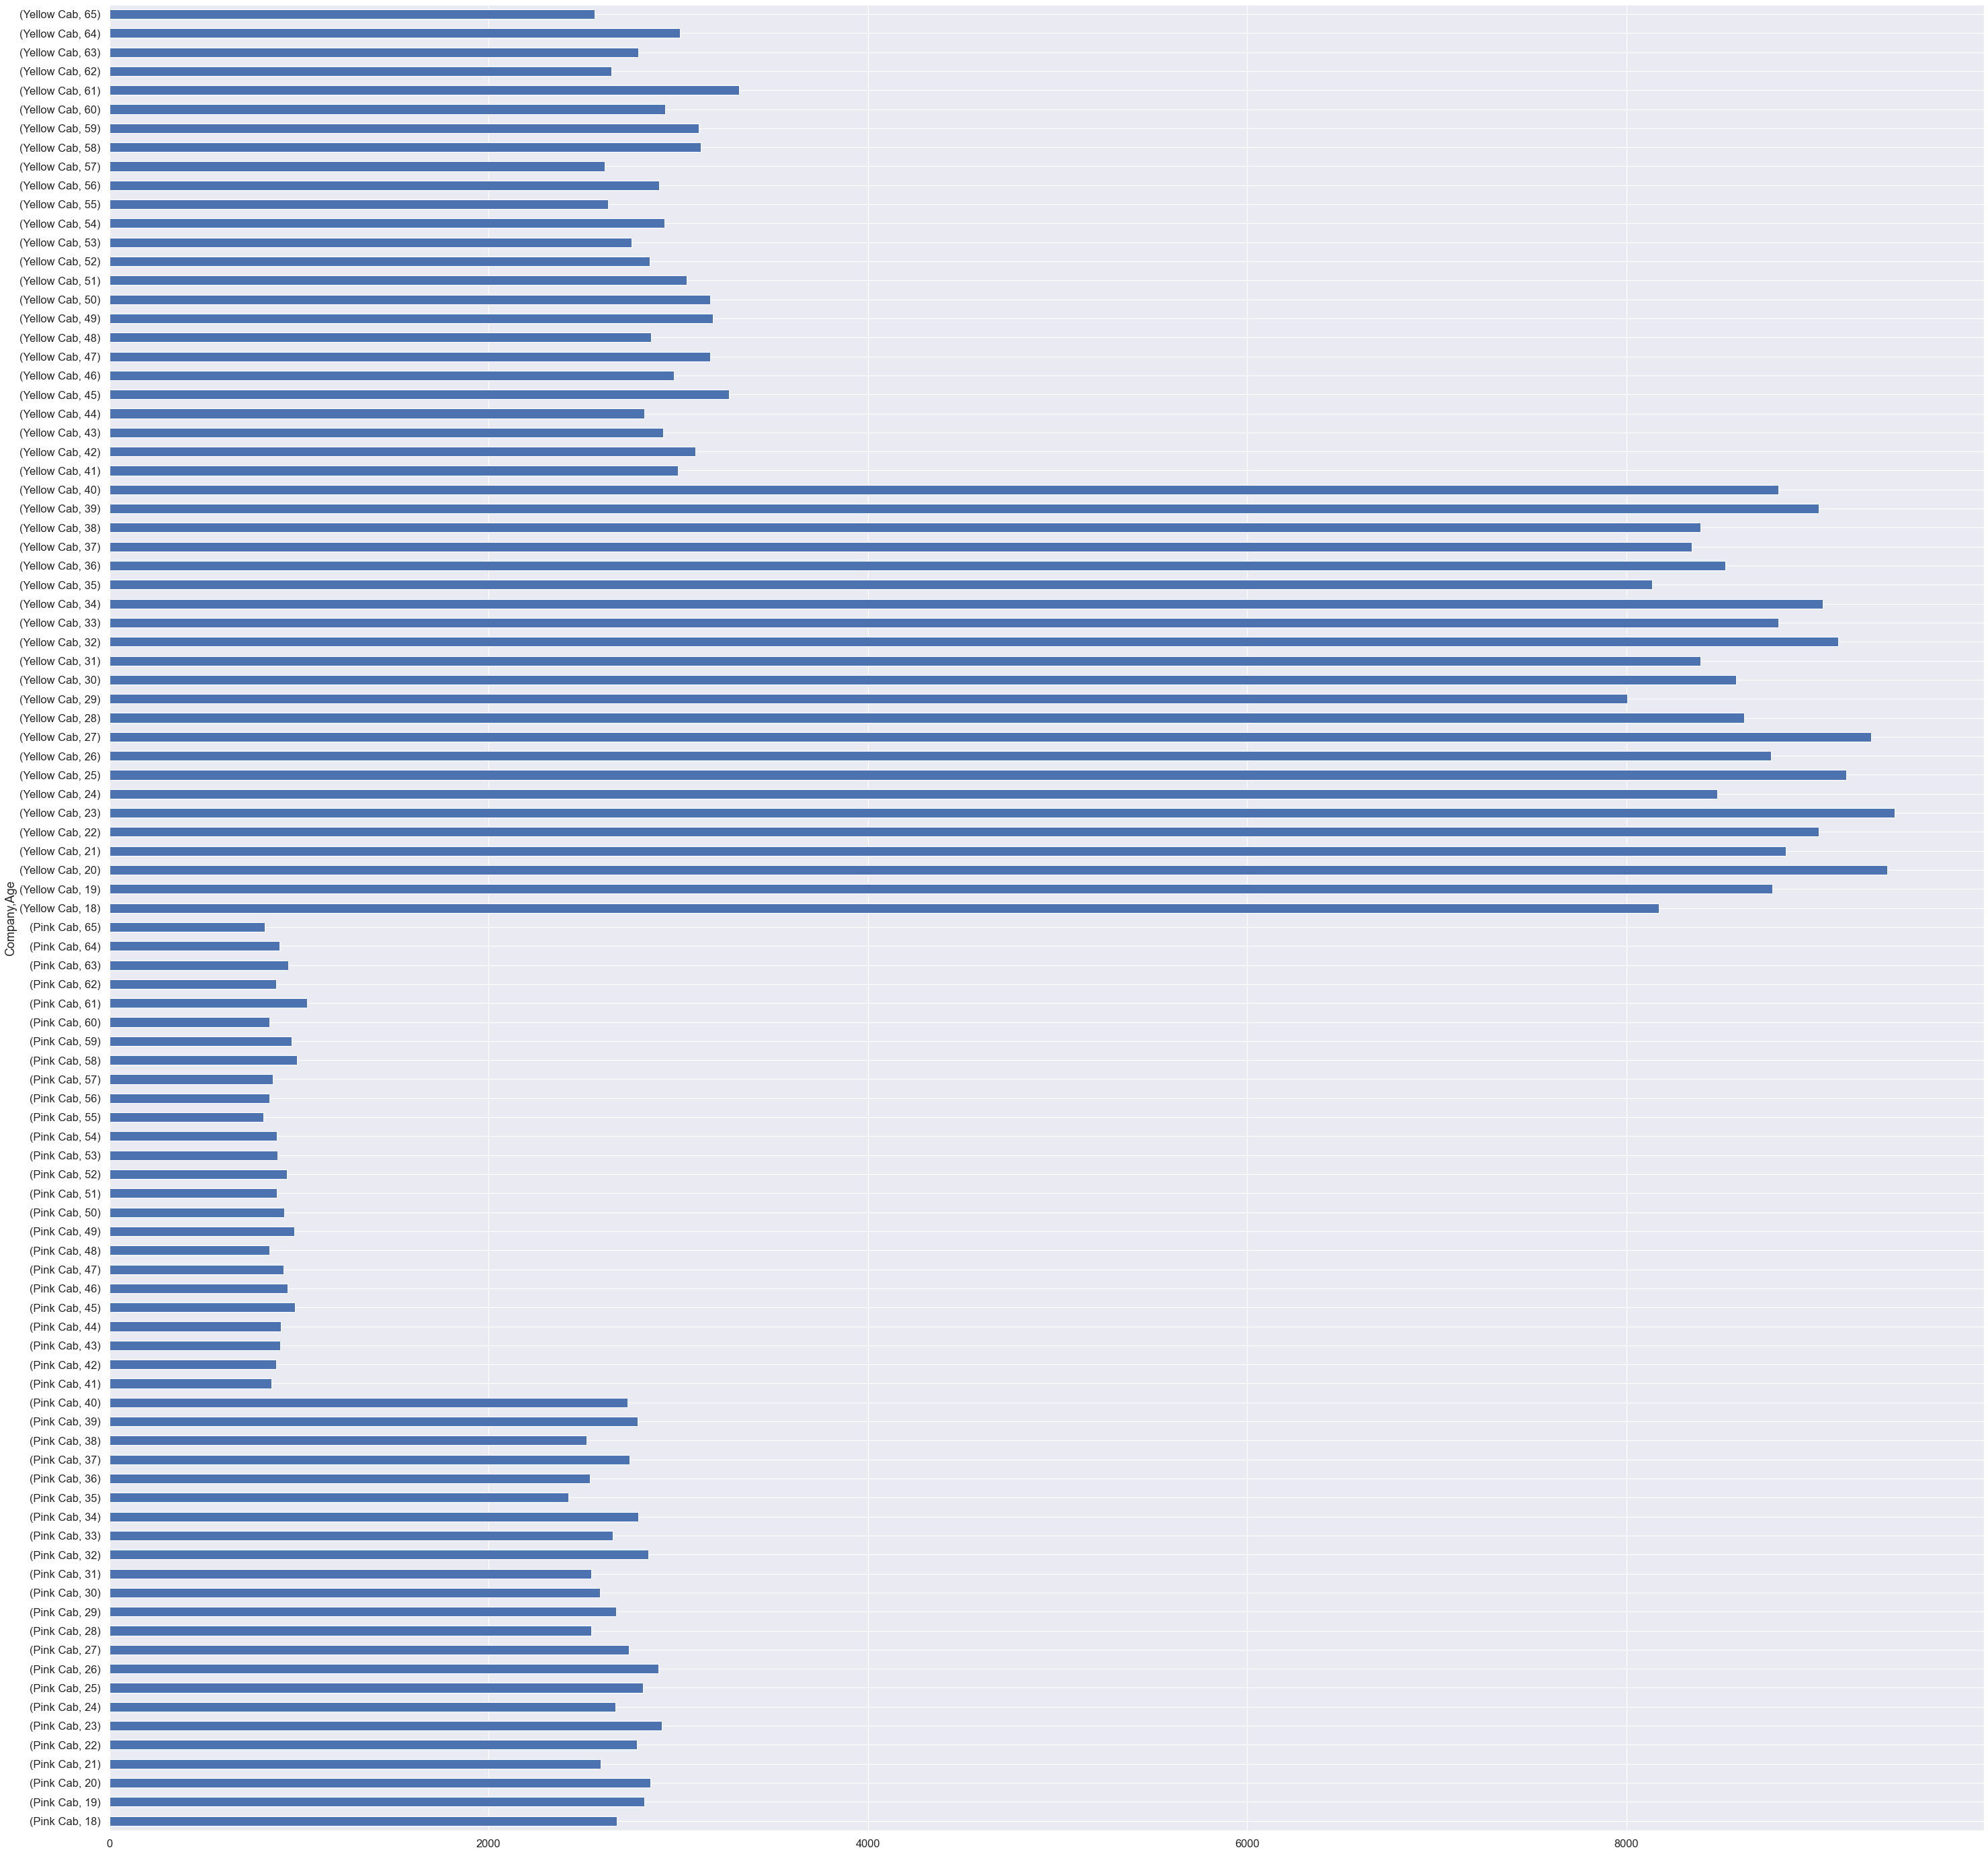

In [64]:
#Age distribution per company 
df.groupby(['Company', 'Age']).Customer_ID.count().plot(kind = 'barh', figsize=(50,50))

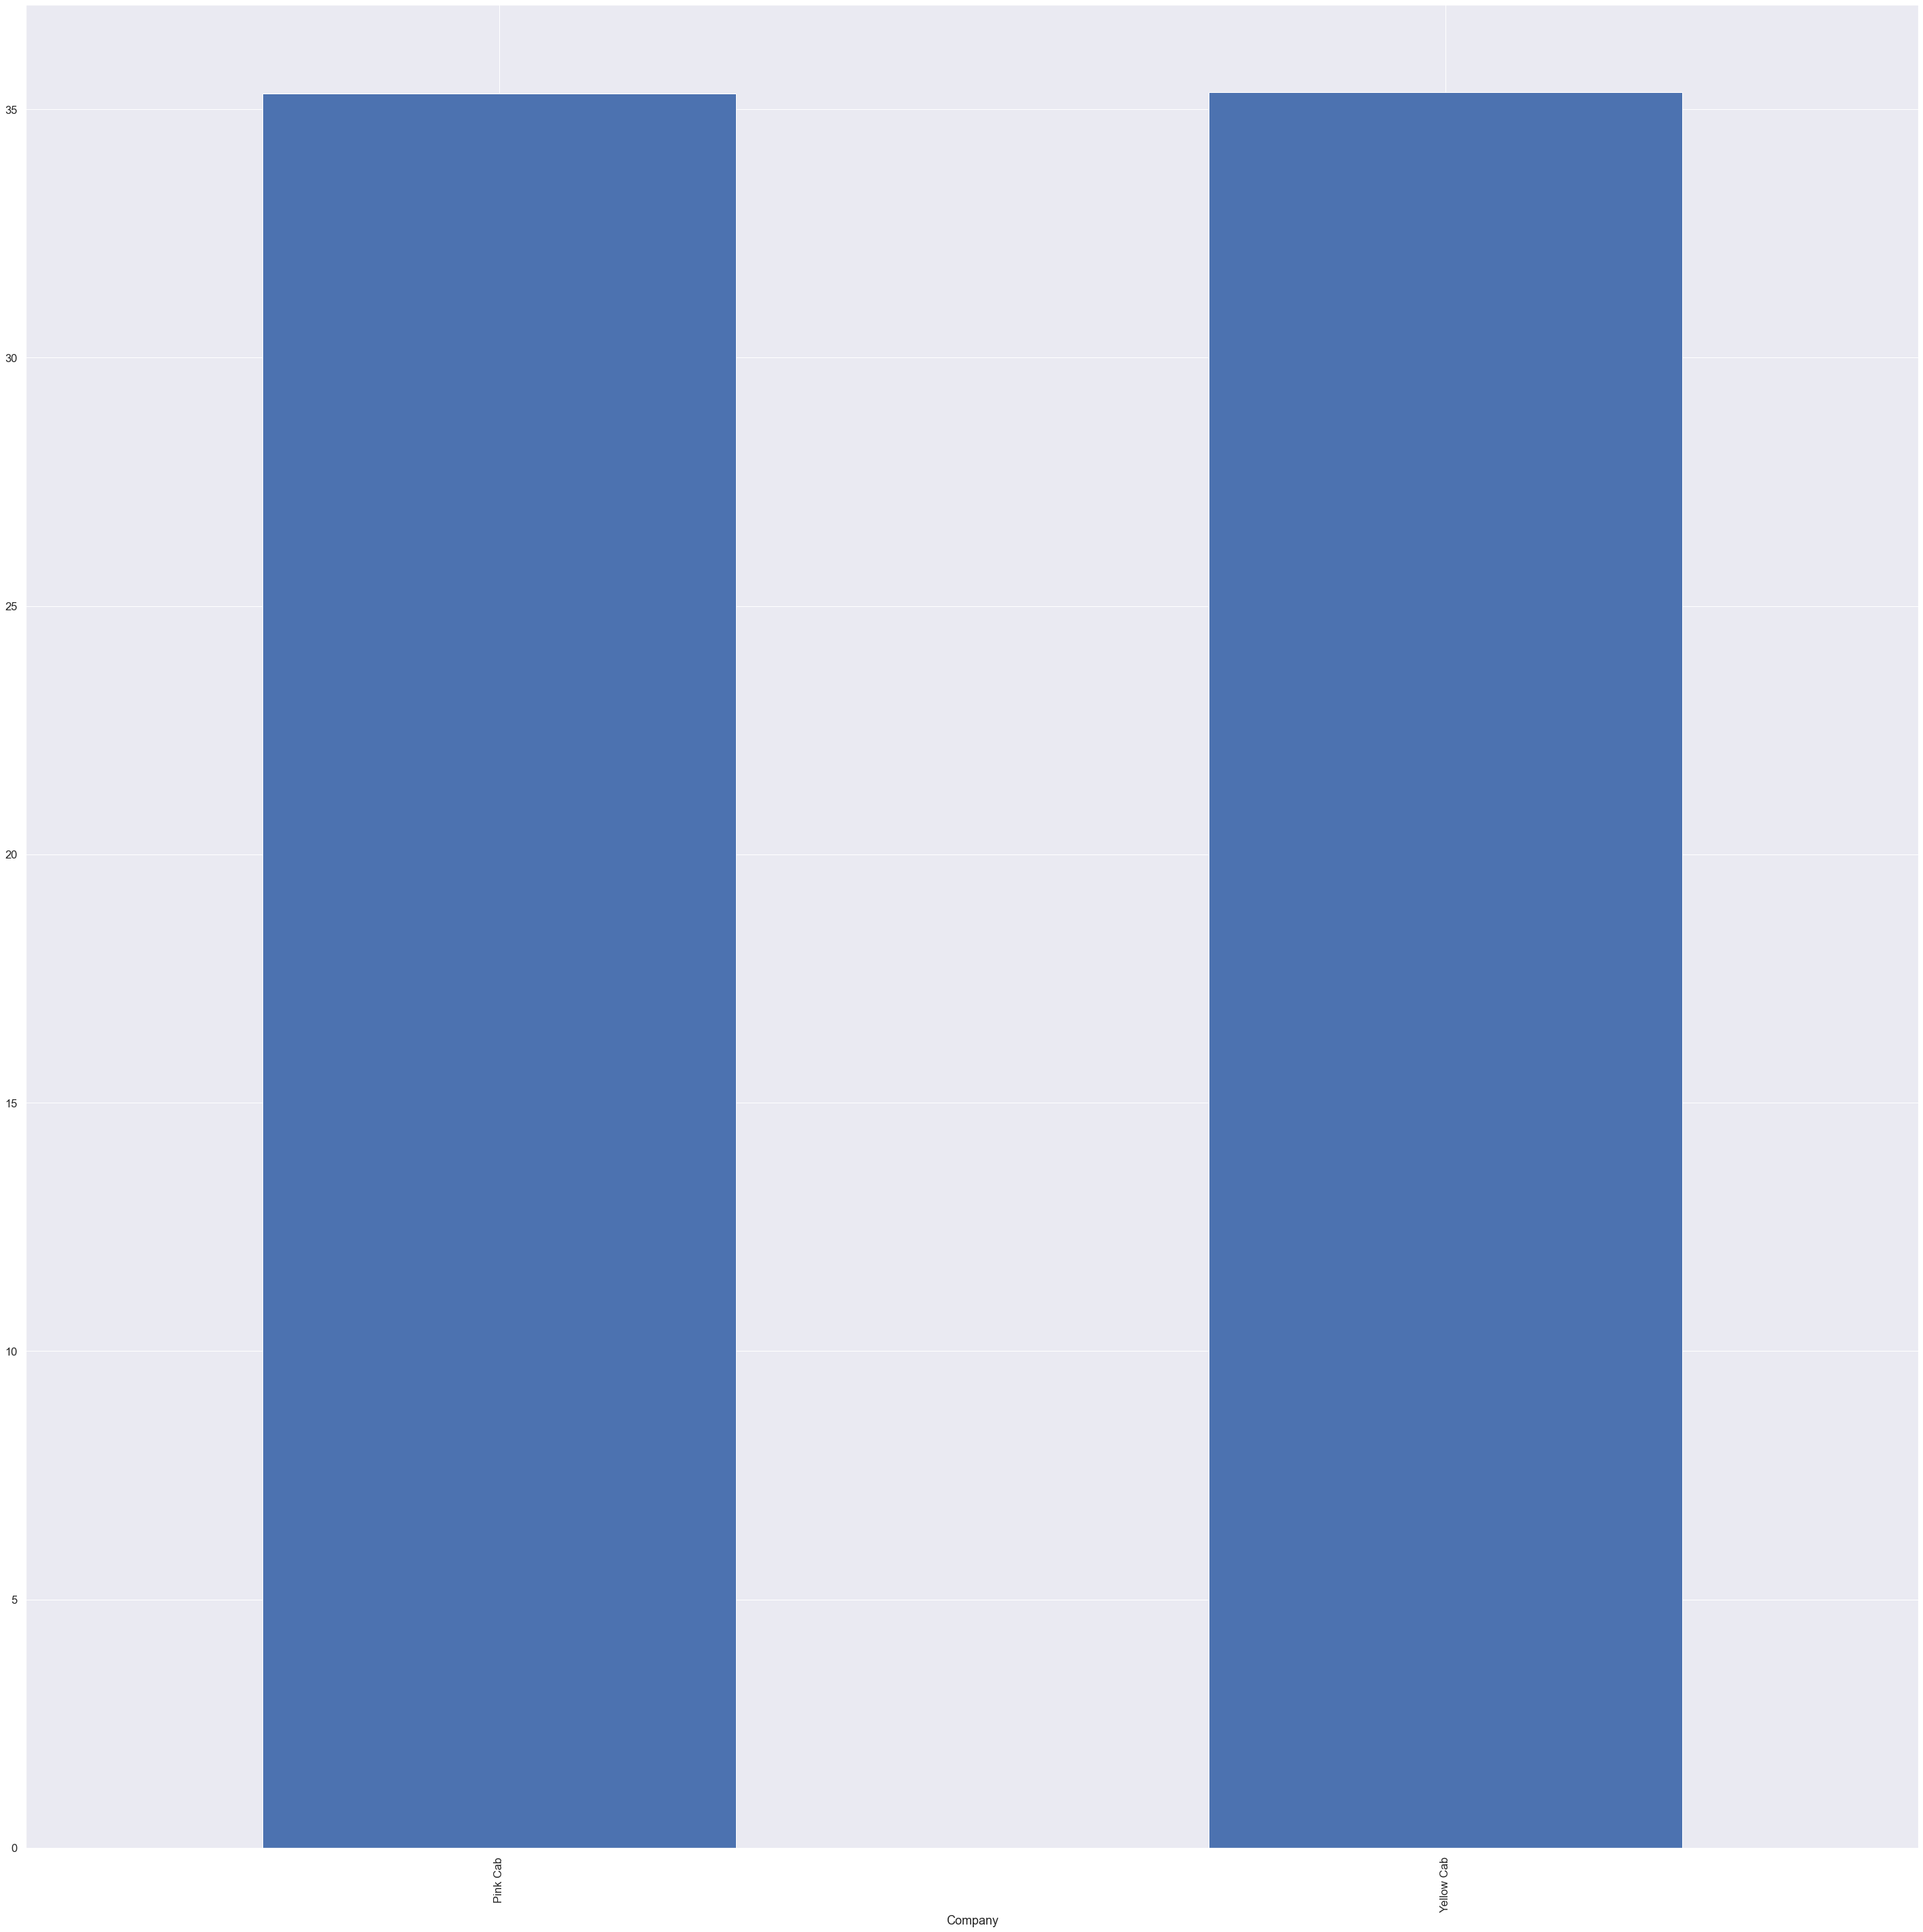

In [65]:
df.groupby(['Company']).Age.mean().plot(kind = 'bar', figsize=(50,50))

In [66]:
df.groupby(['Company']).Age.mean()

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

### 7. Do credit cards or cash tend to cost more per trip?


In [67]:
card = df[df["Payment_Mode"] == "Card"]
cash = df[df["Payment_Mode"] == "Cash"]

In [68]:
card.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Profit,Profit_Proportion,Profit_per_KM
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,29290,Card,Male,28,10813,814885.0,24701.0,57.3150,0.845491,12.182266
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,29290,Card,Male,28,10813,814885.0,24701.0,194.6480,0.754248,18.614571
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,27703,Card,Male,27,9237,814885.0,24701.0,23.6660,0.933990,12.526904
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,27703,Card,Male,27,9237,814885.0,24701.0,253.9808,0.647787,19.821330
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018,10,27703,Card,Male,27,9237,814885.0,24701.0,25.0960,0.849752,12.474235


In [69]:
card.Transaction_ID.count()

215504

In [70]:
cash.Transaction_ID.count()

143888

In [71]:
# What is the ratio of card
print("Average Cost Per Trip with Card: ",card["Cost_of_Trip"].mean())
print("Average Cost Per Trip with Cash: ",cash["Cost_of_Trip"].mean())
print("\nAverage KM_Travelled with Card: ",card["KM_Travelled"].mean())
print("Average KM_Travelled with Cash: ",cash["KM_Travelled"].mean())
print("\nAverage Profit_per_KM with Card: ",card["Profit_per_KM"].mean())
print("Average Profit_per_KM with Cash: ",cash["Profit_per_KM"].mean())
print("\nAverage Profit_Proportion with Card: ",card["Profit_Proportion"].mean())
print("Average Profit_Proportion with Cash: ",cash["Profit_Proportion"].mean())

Average Cost Per Trip with Card:  286.3060724561881
Average Cost Per Trip with Cash:  286.016437712663

Average KM_Travelled with Card:  22.57490900400884
Average KM_Travelled with Cash:  22.555789155454143

Average Profit_per_KM with Card:  18.75803844132498
Average Profit_per_KM with Cash:  18.775744226447916

Average Profit_Proportion with Card:  0.7289266001298824
Average Profit_Proportion with Cash:  0.7284002657975536


In [72]:
## Let's look to NYC specifically -- where most customers and transactions take place, and is a high col area.

print("Average Cost Per Trip with Card for NYC: ",card[card['City'] == "NEW YORK NY"].Cost_of_Trip.mean())
print("Average Cost Per Trip with Cash for NYC: ",cash[cash['City'] == "NEW YORK NY"].Cost_of_Trip.mean())
print("\nAverage KM_Travelled with Card for NYC: ",card[card['City'] == "NEW YORK NY"].KM_Travelled.mean())
print("Average KM_Travelled with Cash for NYC: ",cash[cash['City'] == "NEW YORK NY"].KM_Travelled.mean())
print("\nAverage Profit_per_KM with Card for NYC: ",card[card['City'] == "NEW YORK NY"].Profit_per_KM.mean())
print("Average Profit_per_KM with Cash for NYC: ",cash[cash['City'] == "NEW YORK NY"].Profit_per_KM.mean())
print("\nAverage Profit_Proportion with Card for NYC: ",card[card['City'] == "NEW YORK NY"].Profit_Proportion.mean())
print("Average Profit_Proportion with Cash for NYC: ",cash[cash['City'] == "NEW YORK NY"].Profit_Proportion.mean())

Average Cost Per Trip with Card for NYC:  289.6444665171541
Average Cost Per Trip with Cash for NYC:  291.14861433661326

Average KM_Travelled with Card for NYC:  22.461078493723665
Average KM_Travelled with Cash for NYC:  22.59275694530965

Average Profit_per_KM with Card for NYC:  25.33004540343807
Average Profit_per_KM with Cash for NYC:  25.329844862851804

Average Profit_Proportion with Card for NYC:  0.533562003123696
Average Profit_Proportion with Cash for NYC:  0.5337868845247871
